<a href="https://colab.research.google.com/github/yuukionna022/ComputerVisionFontsExtended/blob/main/ComputerVisionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing required Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

# Datasets

Yolov11-obb model training for text detection:
https://paperswithcode.com/dataset/msra-td500

Font classification:
https://www.kaggle.com/datasets/dhruvmak/font-recognition-data
& added our own 60 images

Link to download all data:
https://1sfu-my.sharepoint.com/:u:/g/personal/pyc5_sfu_ca/ETm6FqCSuPNEhHLVOOxiorwBx971TFl-LYC6jd39nsgfbg?e=UZqSMP

# **Text Detection Model**

In [ ]:
det_test_dir = '/content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test'
det_train_dir = '/content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/train'

In [ ]:
# import os
#run it once for making directories

# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/val')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/test')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/train')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/val')
# os.makedirs('/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/test')

In [ ]:
det_label_dir= "/content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels"
det_image_dir="/content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images"

In [ ]:
import os, glob

def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/Final Project/Detection Dataset/MSRA-TD500/Detection Data/test/*"):
        file_name=os.path.basename(file)

        if file.endswith(".JPG"):
          det_image = (file)
          X.append(det_image)

        if file.endswith(".gt"):
          det_label = (file)
          y.append(det_label)

        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{400} samples',end=' ')
        # print(font_image)
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

In [ ]:
images, labels = load_data()

 Processed 400/400 samples 

In [ ]:
from sklearn.model_selection import train_test_split
# Then further divide the train set into validation
# Note that here, to get 60%-20%, we'll need to divide the 80% train set from above to 75-25 split
# 0.8 * 0.25 = 0.2
X_det_test, X_det_validation = train_test_split(
    images,
    test_size=0.25,
    random_state=42
)

In [ ]:
import shutil
#run it once for copying!
# for file in os.listdir(det_train_dir):
#     if file.endswith(".gt"):
#         shutil.copy(os.path.join(det_train_dir, file), os.path.join(det_label_dir, "train"))
#     if file.endswith(".JPG"):
#         image = Image.open(os.path.join(det_train_dir, file))
#         image = image.convert("RGB")
#         new_filename = os.path.splitext(file)[0] + ".JPG"
#         image.save(os.path.join(det_image_dir,"train", new_filename), "JPEG")


#Copy gt files and jpg files from the test folder to the folders created.
# for file in X_det_test:
#     if file.endswith(".JPG"):
#         image = Image.open(file)
#         image = image.convert("RGB")
#         new_filename = os.path.basename(file)
#         image.save(os.path.join(det_image_dir,"test", new_filename), "JPEG")
        # shutil.copy(os.path.join(det_test_dir, file), os.path.join(det_image_dir, "test"))

        # label = os.path.splitext(file)[0] + ".gt"
        # shutil.copy(os.path.join(det_test_dir, label), os.path.join(det_label_dir, "test"))


# for file in X_det_validation:
#     if file.endswith(".JPG"):
#         image = Image.open(file)
#         image = image.convert("RGB")
#         new_filename = os.path.basename(file)
#         image.save(os.path.join(det_image_dir,"val", new_filename), "JPEG")
        # shutil.copy(os.path.join(det_test_dir, file), os.path.join(det_image_dir, "val"))

        # label = os.path.splitext(file)[0] + ".gt"
        # shutil.copy(os.path.join(det_test_dir, label), os.path.join(det_label_dir, "val"))




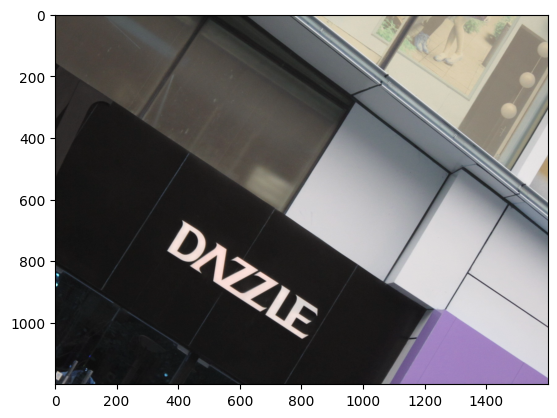

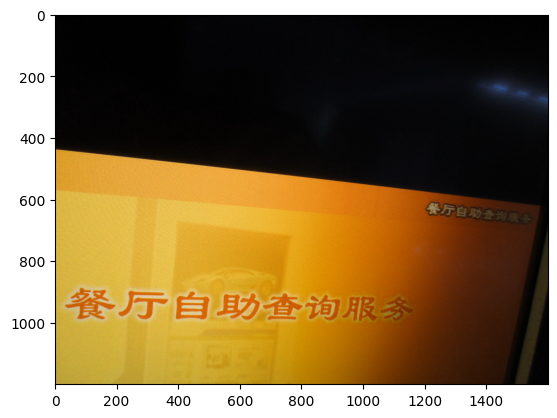

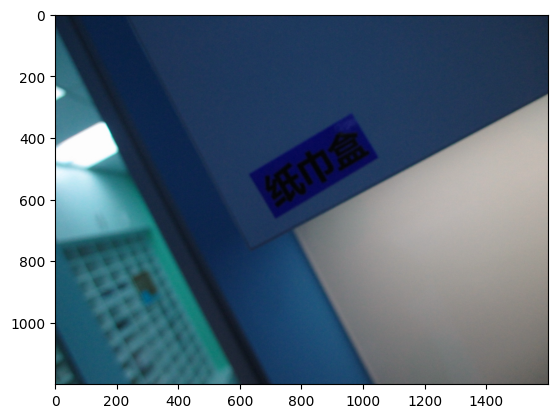

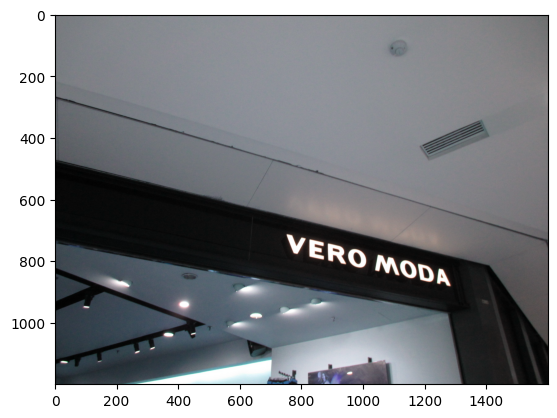

In [ ]:

#visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(det_image_dir, "train"))):
    img = cv2.imread(os.path.join(det_image_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [ ]:
test_labels = "/content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/test"
train_labels = "/content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/train"
val_labels = "/content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/val"

In [ ]:
#create dataframes
labels = []
for file in os.listdir(test_labels):
  if file.endswith(".gt"):
    file_path = os.path.join(test_labels, file)
    with open(file_path, "r") as label:
      for line in label:
        values = line.strip().split()
        if len(values) == 0:
          print(file)
        else:
          xmin = int(values[2])
          ymin = int(values[3])
          xmax = int(values[2]) + int(values[4])
          ymax = int(values[3]) + int(values[5])
          name = os.path.splitext(file)[0]

          labels.append({
            "file name":name,
            "label" : 0,
            "width" : int(values[4]),
            "height" : int(values[5]),
            "xmin" : xmin,
            "ymin" : ymin,
            "xmax" : xmax,
            "ymax" : ymax,
            "angle" : float(values[6])
        })

test_df = pd.DataFrame(labels)
test_df

file name  label  width  height  xmin  ymin  xmax  ymax     angle
0    IMG_2166      0    806     128   529   697  1335   825 -0.267478
1    IMG_2166      0    853     190   405   296  1258   486 -0.258402
2    IMG_2215      0    952     140   177   731  1129   871 -0.063879
3    IMG_1578      0    721     109    74   507   795   616  0.025672
4    IMG_1578      0    731      95   403   884  1134   979 -0.151897
..        ...    ...    ...     ...   ...   ...   ...   ...       ...
509  IMG_1933      0    447      45   431  1061   878  1106  0.177425
510  IMG_1933      0   1071      77   143   912  1214   989  0.180355
511  IMG_1933      0    786     256   343   532  1129   788  0.187148
512  IMG_1933      0    224      43   761   246   985   289  0.204642
513  IMG_1933      0    325      38  1053   323  1378   361  0.212855

[514 rows x 9 columns]

In [ ]:
labels = []
for file in os.listdir(train_labels):
  if file.endswith(".gt"):
    file_path = os.path.join(train_labels, file)
    with open(file_path, "r") as label:
      for line in label:
        values = line.strip().split()
        if len(values) == 0:
          print(file)
        else:
          xmin = int(values[2])
          ymin = int(values[3])
          xmax = int(values[2]) + int(values[4])
          ymax = int(values[3]) + int(values[5])
          name = os.path.splitext(file)[0]

          labels.append({
            "file name":name,
            "label" : 0,
            "width" : int(values[4]),
            "height" : int(values[5]),
            "xmin" : xmin,
            "ymin" : ymin,
            "xmax" : xmax,
            "ymax" : ymax,
            "angle" : float(values[6])
        })

train_df = pd.DataFrame(labels)
train_df

file name  label  width  height  xmin  ymin  xmax  ymax     angle
0     IMG_2031      0    338     150  1194   884  1532  1034  0.078784
1     IMG_2031      0    282      95  1195  1074  1477  1169  0.068562
2     IMG_2031      0    932     246    76   902  1008  1148  0.034817
3     IMG_2184      0    777     125   645   319  1422   444  0.609087
4     IMG_2184      0    607      44   691   460  1298   504  0.601509
...        ...    ...    ...     ...   ...   ...   ...   ...       ...
1063  IMG_0476      0    184      13   865   715  1049   728  0.087687
1064  IMG_0660      0    255     958   888   192  1143  1150  0.167727
1065  IMG_0660      0     27     715  1380   546  1407  1261 -0.285463
1066  IMG_0155      0    528     140   283   251   811   391 -0.181725
1067  IMG_0155      0    426      40   575   446  1001   486 -0.168750

[1068 rows x 9 columns]

In [ ]:
labels = []
for file in os.listdir(val_labels):
  if file.endswith(".gt"):
    file_path = os.path.join(val_labels, file)
    with open(file_path, "r") as label:
      for line in label:
        values = line.strip().split()
        if len(values) == 0:
          print(file)
        else:
          xmin = int(values[2])
          ymin = int(values[3])
          xmax = int(values[2]) + int(values[4])
          ymax = int(values[3]) + int(values[5])
          name = os.path.splitext(file)[0]

          labels.append({
            "file name":name,
            "label" : 0,
            "width" : int(values[4]),
            "height" : int(values[5]),
            "xmin" : xmin,
            "ymin" : ymin,
            "xmax" : xmax,
            "ymax" : ymax,
            "angle" : float(values[6])
        })

val_df = pd.DataFrame(labels)
val_df

file name  label  width  height  xmin  ymin  xmax  ymax     angle
0    IMG_0831      0    593     132   895   514  1488   646 -0.015489
1    IMG_0831      0    582      63   892   700  1474   763 -0.005163
2    IMG_1764      0    893     476   566   127  1459   603  0.306771
3    IMG_1764      0    831     313   545   592  1376   905  0.173561
4    IMG_2034      0   1458     156    28   673  1486   829  0.611232
..        ...    ...    ...     ...   ...   ...   ...   ...       ...
132  IMG_1556      0    359      95   709   302  1068   397  0.219640
133  IMG_1556      0    432      57   669   432  1101   489  0.192757
134  IMG_1556      0    437     108   662   608  1099   716  0.137304
135  IMG_1772      0    142     183   811   917   953  1100  0.110051
136  IMG_1772      0   1020     316   395   381  1415   697  0.042215

[137 rows x 9 columns]

<ipython-input-41-5e3f2be88d07>:13: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box_points = np.int0(box_points)


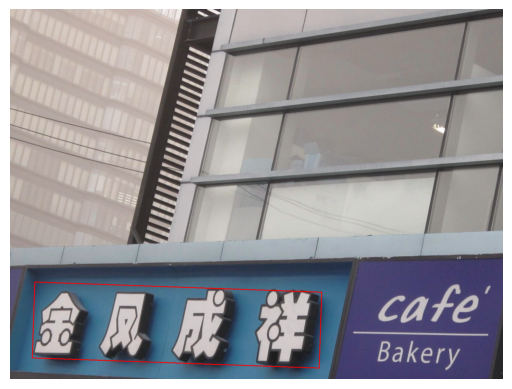

In [ ]:
import math
index= 2 #picture to visualize

#import cv2
image = cv2.imread(os.path.join(det_image_dir,"train", train_df["file name"][index]+".JPG"), 1)
# Draw rectangle
center_x = int (train_df['xmin'][index] + train_df['width'][index] / 2)
center_y = int (train_df['ymin'][index] + train_df['height'][index] / 2)
angle = math.degrees(train_df['angle'][index])

rect = ((center_x, center_y), (int(train_df['width'][index]),int(train_df['height'][index])), angle)
box_points = cv2.boxPoints(rect)
box_points = np.int0(box_points)

cv2.polylines(image, [box_points], isClosed=True, color=(255, 0, 0), thickness=2)
# Display image
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
train_df["file name"][index]
filtered_df = train_df[train_df['file name'] == train_df["file name"][index]]
print(filtered_df)

  file name  label  width  height  xmin  ymin  xmax  ymax     angle
0  IMG_2031      0    338     150  1194   884  1532  1034  0.078784
1  IMG_2031      0    282      95  1195  1074  1477  1169  0.068562
2  IMG_2031      0    932     246    76   902  1008  1148  0.034817


In [ ]:
def calculate_corners(x, y, w, h, ang, img_width, img_height):

  # normalize everything first
  x /= img_width
  y /= img_height
  w /= img_width
  h /= img_height

  x_center = (x + w/2) * img_width
  y_center = (y + h/2) * img_height
  w *= img_width
  h *= img_height

  corners = np.array([
      [-w/2, -h/2],
      [w/2, -h/2],
      [w/2, h/2],
      [-w/2, h/2]
  ])

  #create a rotation matric and rotate the corners
  #https://www.reddit.com/r/learnpython/comments/1e8os0i/rotating_a_vertex_using_numpy/
  #https://stackoverflow.com/questions/20840692/rotation-of-a-2d-array-over-an-angle-using-rotation-matrix
  rotation_matrix = np.array([
      [np.cos(ang), -np.sin(ang)],
      [np.sin(ang), np.cos(ang)]
  ])

  rotated_corners = np.dot(corners, rotation_matrix.T)
  absolute = rotated_corners + np.array([x_center, y_center])

  final = absolute / np.array([img_width, img_height])

  return final.flatten().tolist()

In [ ]:
for index in range(len(train_df)):
  xmin = train_df['xmin'][index]
  ymin = train_df['ymin'][index]
  width = train_df['width'][index]
  height = train_df['height'][index]
  angle = train_df['angle'][index]
  class_id = 0

  image_file_path = os.path.join(det_image_dir, "train", train_df["file name"][index] + ".JPG")

  #get dimension
  image = cv2.imread(image_file_path)
  image_height, image_width, _ = image.shape

  rotated_corners = calculate_corners(xmin, ymin, width, height, angle, image_width, image_height)
  # print(xmin)
  # print(ymin)
  # print(width)
  # print(height)
  # print(angle)
  # print(image_height)
  # print(image_width)
  # print(rotated_corners)

  x1 = rotated_corners[0]
  y1 = rotated_corners[1]
  x2 = rotated_corners[2]
  y2 = rotated_corners[3]
  x3 = rotated_corners[4]
  y3 = rotated_corners[5]
  x4 = rotated_corners[6]
  y4 = rotated_corners[7]

  yolo_obb_annotation = f"{class_id} {x1} {y1} {x2} {y2} {x3} {y3} {x4} {y4}"

  label_path= os.path.join(train_labels, f"{train_df['file name'][index]}.txt")
  with open(label_path, "a") as file:
    file.write( yolo_obb_annotation + "\n")

In [ ]:
for index in range(len(test_df)):
  xmin = test_df['xmin'][index]
  ymin = test_df['ymin'][index]
  width = test_df['width'][index]
  height = test_df['height'][index]
  angle = test_df['angle'][index]
  class_id = 0

  image_file_path = os.path.join(det_image_dir, "test", test_df["file name"][index] + ".JPG")

  #get dimension
  image = cv2.imread(image_file_path)
  image_height, image_width, _ = image.shape

  rotated_corners = calculate_corners(xmin, ymin, width, height, angle, image_width, image_height)

  x1 = rotated_corners[0]
  y1 = rotated_corners[1]
  x2 = rotated_corners[2]
  y2 = rotated_corners[3]
  x3 = rotated_corners[4]
  y3 = rotated_corners[5]
  x4 = rotated_corners[6]
  y4 = rotated_corners[7]

  yolo_obb_annotation = f"{class_id} {x1} {y1} {x2} {y2} {x3} {y3} {x4} {y4}"

  label_path= os.path.join(test_labels, f"{test_df['file name'][index]}.txt")
  with open(label_path, "a") as file:
    file.write( yolo_obb_annotation + "\n")

In [ ]:
for index in range(len(val_df)):
  xmin = val_df['xmin'][index]
  ymin = val_df['ymin'][index]
  width = val_df['width'][index]
  height = val_df['height'][index]
  angle = val_df['angle'][index]
  class_id = 0

  image_file_path = os.path.join(det_image_dir, "val", val_df["file name"][index] + ".JPG")

  #get dimension
  image = cv2.imread(image_file_path)
  image_height, image_width, _ = image.shape

  rotated_corners = calculate_corners(xmin, ymin, width, height, angle, image_width, image_height)

  x1 = rotated_corners[0]
  y1 = rotated_corners[1]
  x2 = rotated_corners[2]
  y2 = rotated_corners[3]
  x3 = rotated_corners[4]
  y3 = rotated_corners[5]
  x4 = rotated_corners[6]
  y4 = rotated_corners[7]

  yolo_obb_annotation = f"{class_id} {x1} {y1} {x2} {y2} {x3} {y3} {x4} {y4}"

  label_path= os.path.join(val_labels, f"{val_df['file name'][index]}.txt")
  with open(label_path, "a") as file:
    file.write( yolo_obb_annotation + "\n")

In [ ]:

#The lists of all the images and labels for train and validation set:
train_images=glob.glob(os.path.join(det_image_dir, "train",'*.JPG'))
train_labels=glob.glob(os.path.join(det_label_dir, "train",'*.txt'))
val_images=glob.glob(os.path.join(det_image_dir, "val",'*.JPG'))
val_labels=glob.glob(os.path.join(det_label_dir, "val",'*.txt'))
#print(val_labels)

# Get the list of filenames without extensions
image_files_train = {file.split("/")[-1].split(".")[0] for file in train_images}
label_files_train = {file.split("/")[-1].split(".")[0] for file in train_labels}

image_files_val = {file.split("/")[-1].split(".")[0] for file in val_images}
label_files_val = {file.split("/")[-1].split(".")[0] for file in val_labels}

In [ ]:
print(len(image_files_val), "  =  ", len(label_files_val))

49   =   49


# Training Yolo OBB model

In [ ]:
%%writefile config.yaml
path: /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data
train: images/train
test: images/test
val: images/val

# Classes
nc: 1 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: text

#write yaml

Writing config.yaml


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 32.6/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
%matplotlib inline
from PIL import Image

# Third+ training

In [ ]:
model3 = YOLO('yolo11s-obb.pt')

In [ ]:
model3.train(data="/content/config.yaml",epochs=15,patience=5,batch=10, lr0=0.005,imgsz=640, show_labels = False, save_crop = True)

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=obb, mode=train, model=yolo11s-obb.pt, data=/content/config.yaml, epochs=15, time=None, patience=5, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=True, show_labels=False, show_conf=True, sho

train: Scanning /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/train.cache... 294 images, 0 backgrounds, 3 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train/IMG_1761.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0591]
train: WARNING ⚠️ /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train/IMG_1805.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.015]
train: WARNING ⚠️ /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train/IMG_2029.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0277]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/val.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/obb/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.00046875), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/obb/train4
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      3.23G       2.11      2.972      2.509         10        640: 100%|██████████| 30/30 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.89it/s]

                   all         49        137       0.51      0.496      0.459      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      3.19G      1.572      1.675      2.274          5        640: 100%|██████████| 30/30 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.23it/s]

                   all         49        137      0.698      0.591      0.635       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      3.12G       1.58      1.412      2.308          2        640: 100%|██████████| 30/30 [00:03<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.78it/s]

                   all         49        137      0.705      0.611      0.611      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      3.15G      1.541      1.286      2.331          2        640: 100%|██████████| 30/30 [00:03<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.22it/s]

                   all         49        137      0.771      0.657        0.7        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      3.15G      1.551       1.18      2.315          3        640: 100%|██████████| 30/30 [00:03<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.63it/s]

                   all         49        137      0.774      0.675      0.695      0.446


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      3.12G      1.298      1.119      2.169          1        640: 100%|██████████| 30/30 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.89it/s]


                   all         49        137       0.87      0.633      0.705      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      3.15G      1.324      1.095      2.291          1        640: 100%|██████████| 30/30 [00:03<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.44it/s]


                   all         49        137      0.654      0.591      0.552       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      3.12G      1.238     0.9924      2.155          2        640: 100%|██████████| 30/30 [00:03<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.15it/s]

                   all         49        137      0.852       0.63       0.73      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      3.16G      1.276      1.104      2.146          1        640: 100%|██████████| 30/30 [00:03<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.74it/s]

                   all         49        137      0.899       0.65      0.733      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      3.13G      1.193     0.9275      2.098          3        640: 100%|██████████| 30/30 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.22it/s]

                   all         49        137      0.793      0.613      0.694      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      3.12G      1.129     0.8727      1.993          4        640: 100%|██████████| 30/30 [00:03<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.18it/s]

                   all         49        137      0.804      0.661      0.704      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      3.12G      1.079     0.8251      1.868          1        640: 100%|██████████| 30/30 [00:03<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.11it/s]

                   all         49        137      0.834      0.672      0.723      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      3.14G       1.03     0.7822      1.849          2        640: 100%|██████████| 30/30 [00:03<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.98it/s]

                   all         49        137      0.857       0.65      0.709      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      3.15G      1.012     0.7909      1.945          8        640: 100%|██████████| 30/30 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.69it/s]

                   all         49        137      0.842      0.657      0.715      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      3.13G     0.9865     0.7418      1.817          6        640: 100%|██████████| 30/30 [00:03<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.61it/s]

                   all         49        137      0.837      0.679      0.743      0.509



15 epochs completed in 0.024 hours.
Optimizer stripped from runs/obb/train4/weights/last.pt, 19.9MB
Optimizer stripped from runs/obb/train4/weights/best.pt, 19.9MB

Validating runs/obb/train4/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11s-obb summary (fused): 257 layers, 9,699,174 parameters, 0 gradients, 22.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.24it/s]


                   all         49        137      0.837      0.679      0.743       0.51
Speed: 0.4ms preprocess, 3.3ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/obb/train4


ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0724299cc0>
curves: []
curves_results: []
fitness: 0.5329379674364778
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.50957])
names: {0: 'text'}
plot: True
results_dict: {'metrics/precision(B)': 0.8372309803720206, 'metrics/recall(B)': 0.6788321167883211, 'metrics/mAP50(B)': 0.7432559156047402, 'metrics/mAP50-95(B)': 0.5095693065288931, 'fitness': 0.5329379674364778}
save_dir: PosixPath('runs/obb/train4')
speed: {'preprocess': 0.3982222810083506, 'inference': 3.2756085298499285, 'loss': 0.001352660510004783, 'postprocess': 4.292711919667769}

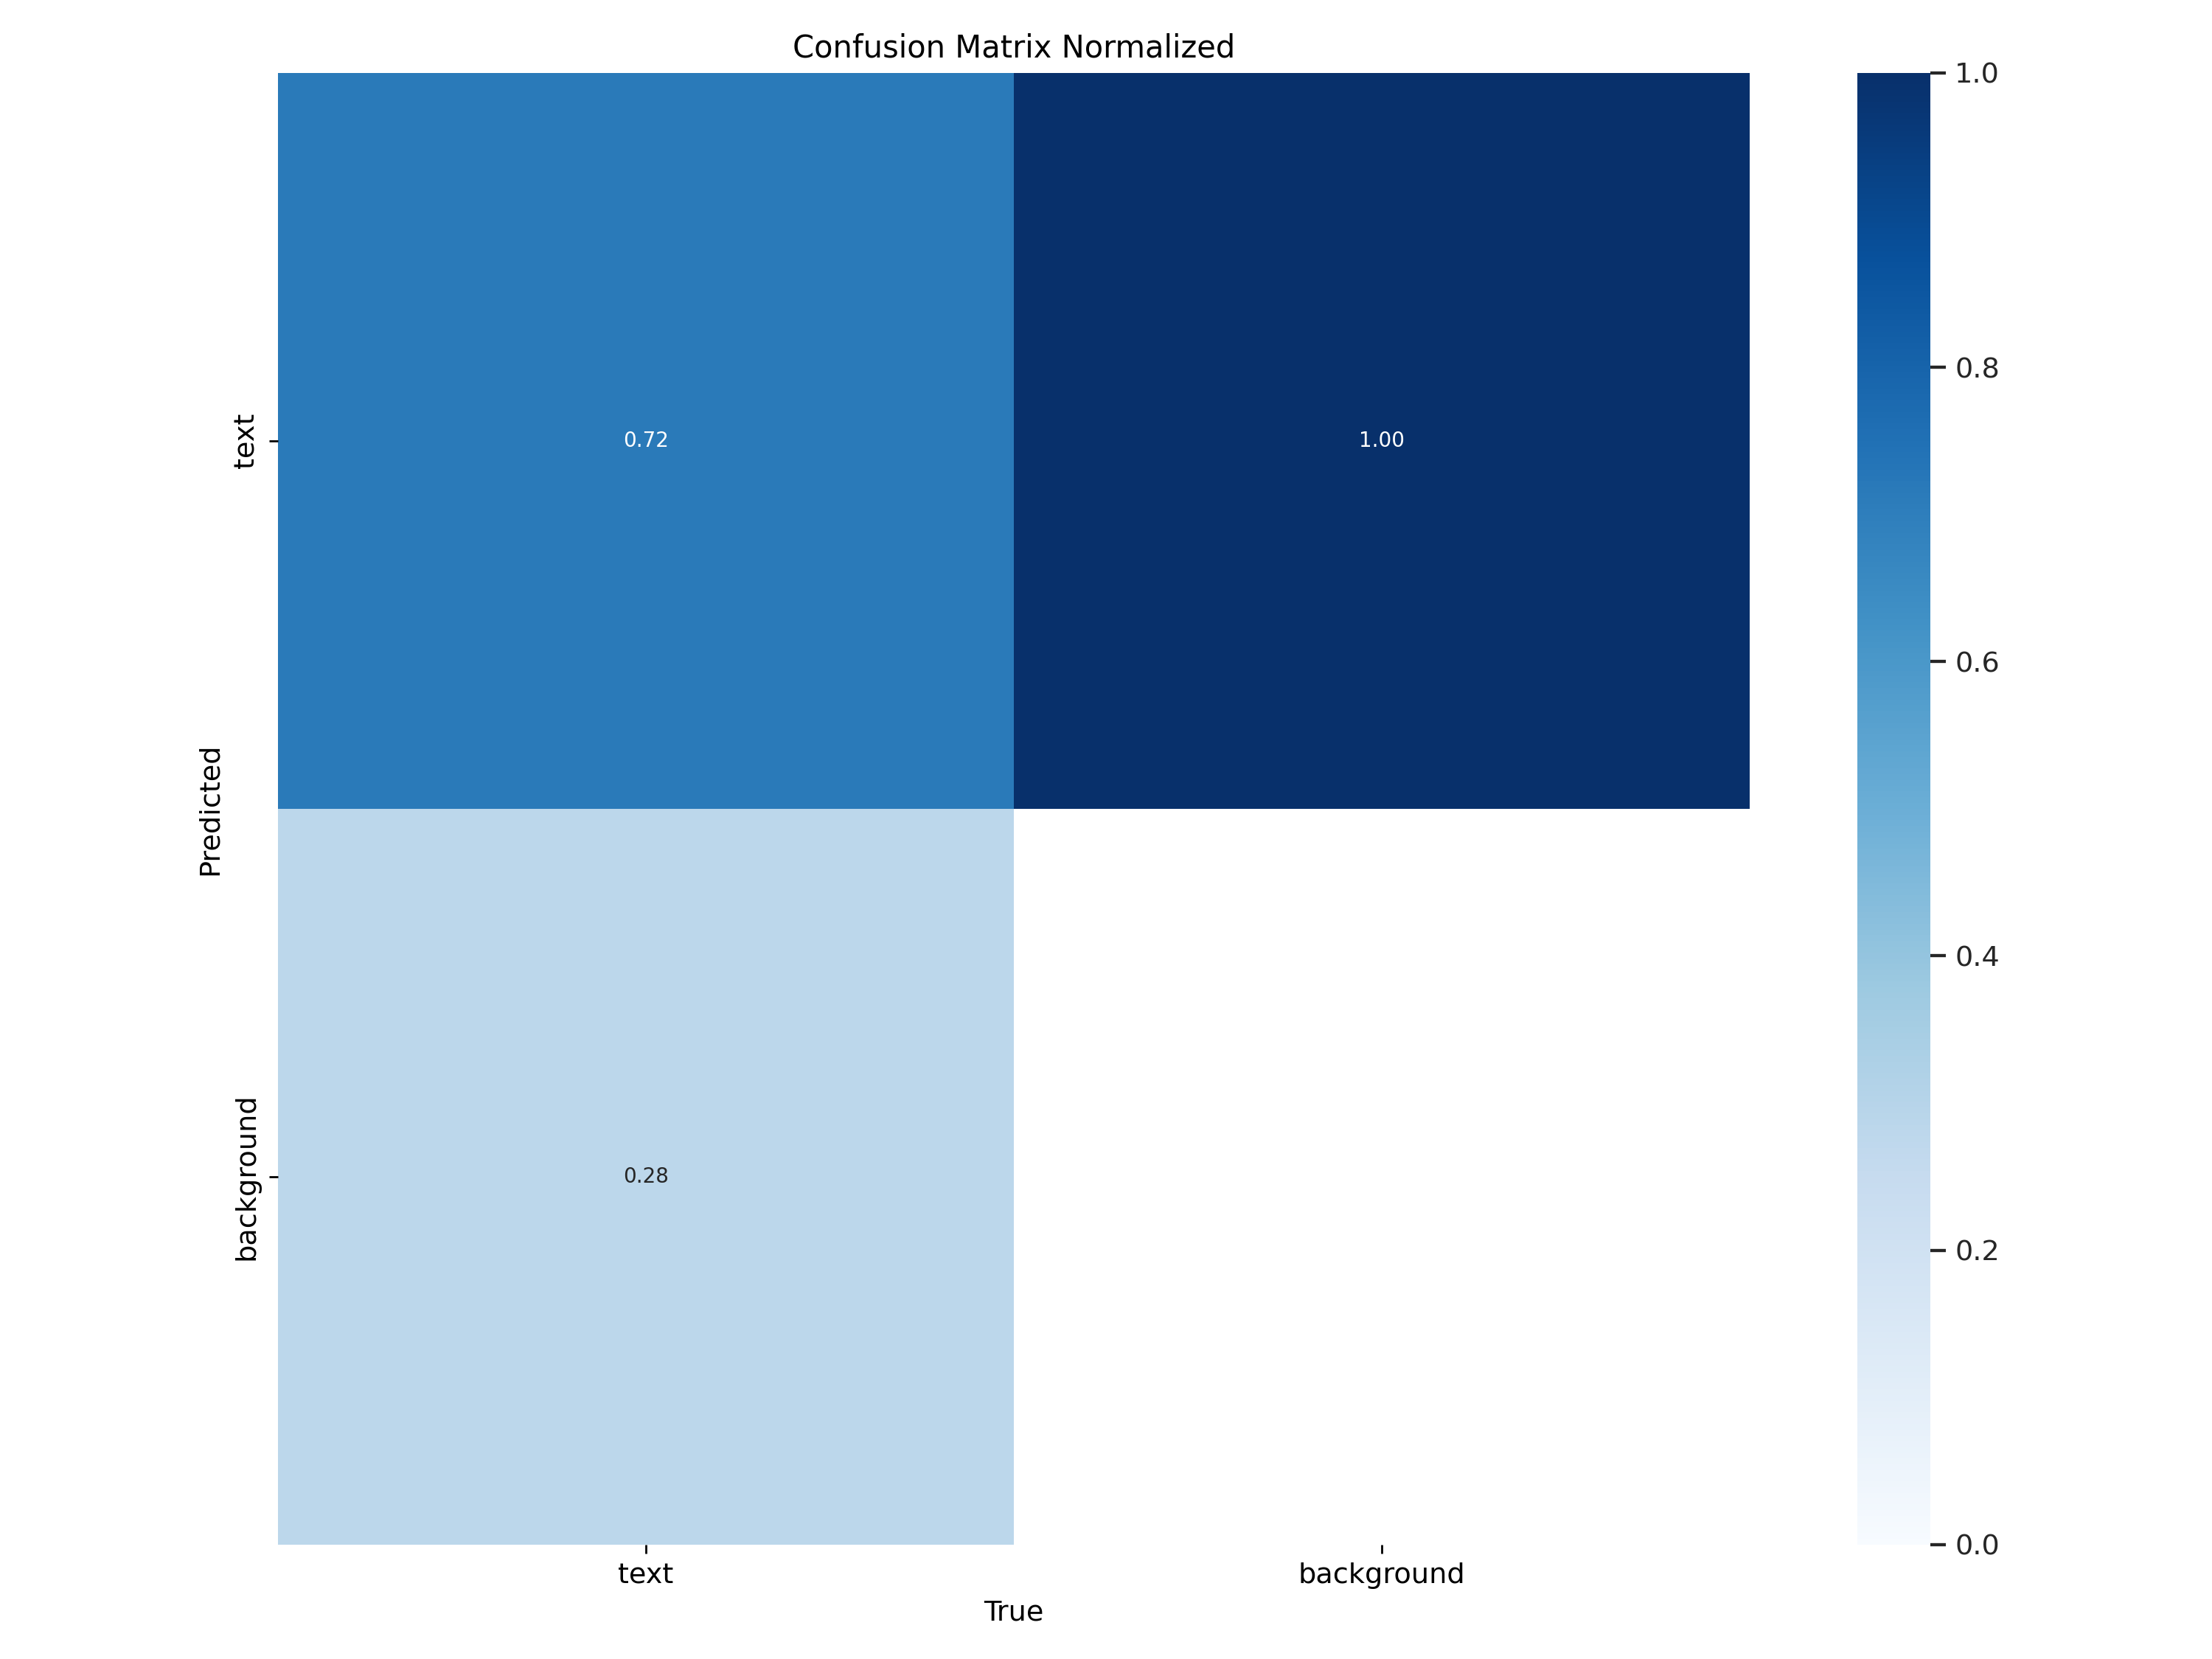

In [ ]:
Image.open("/content/runs/obb/train4/confusion_matrix_normalized.png")

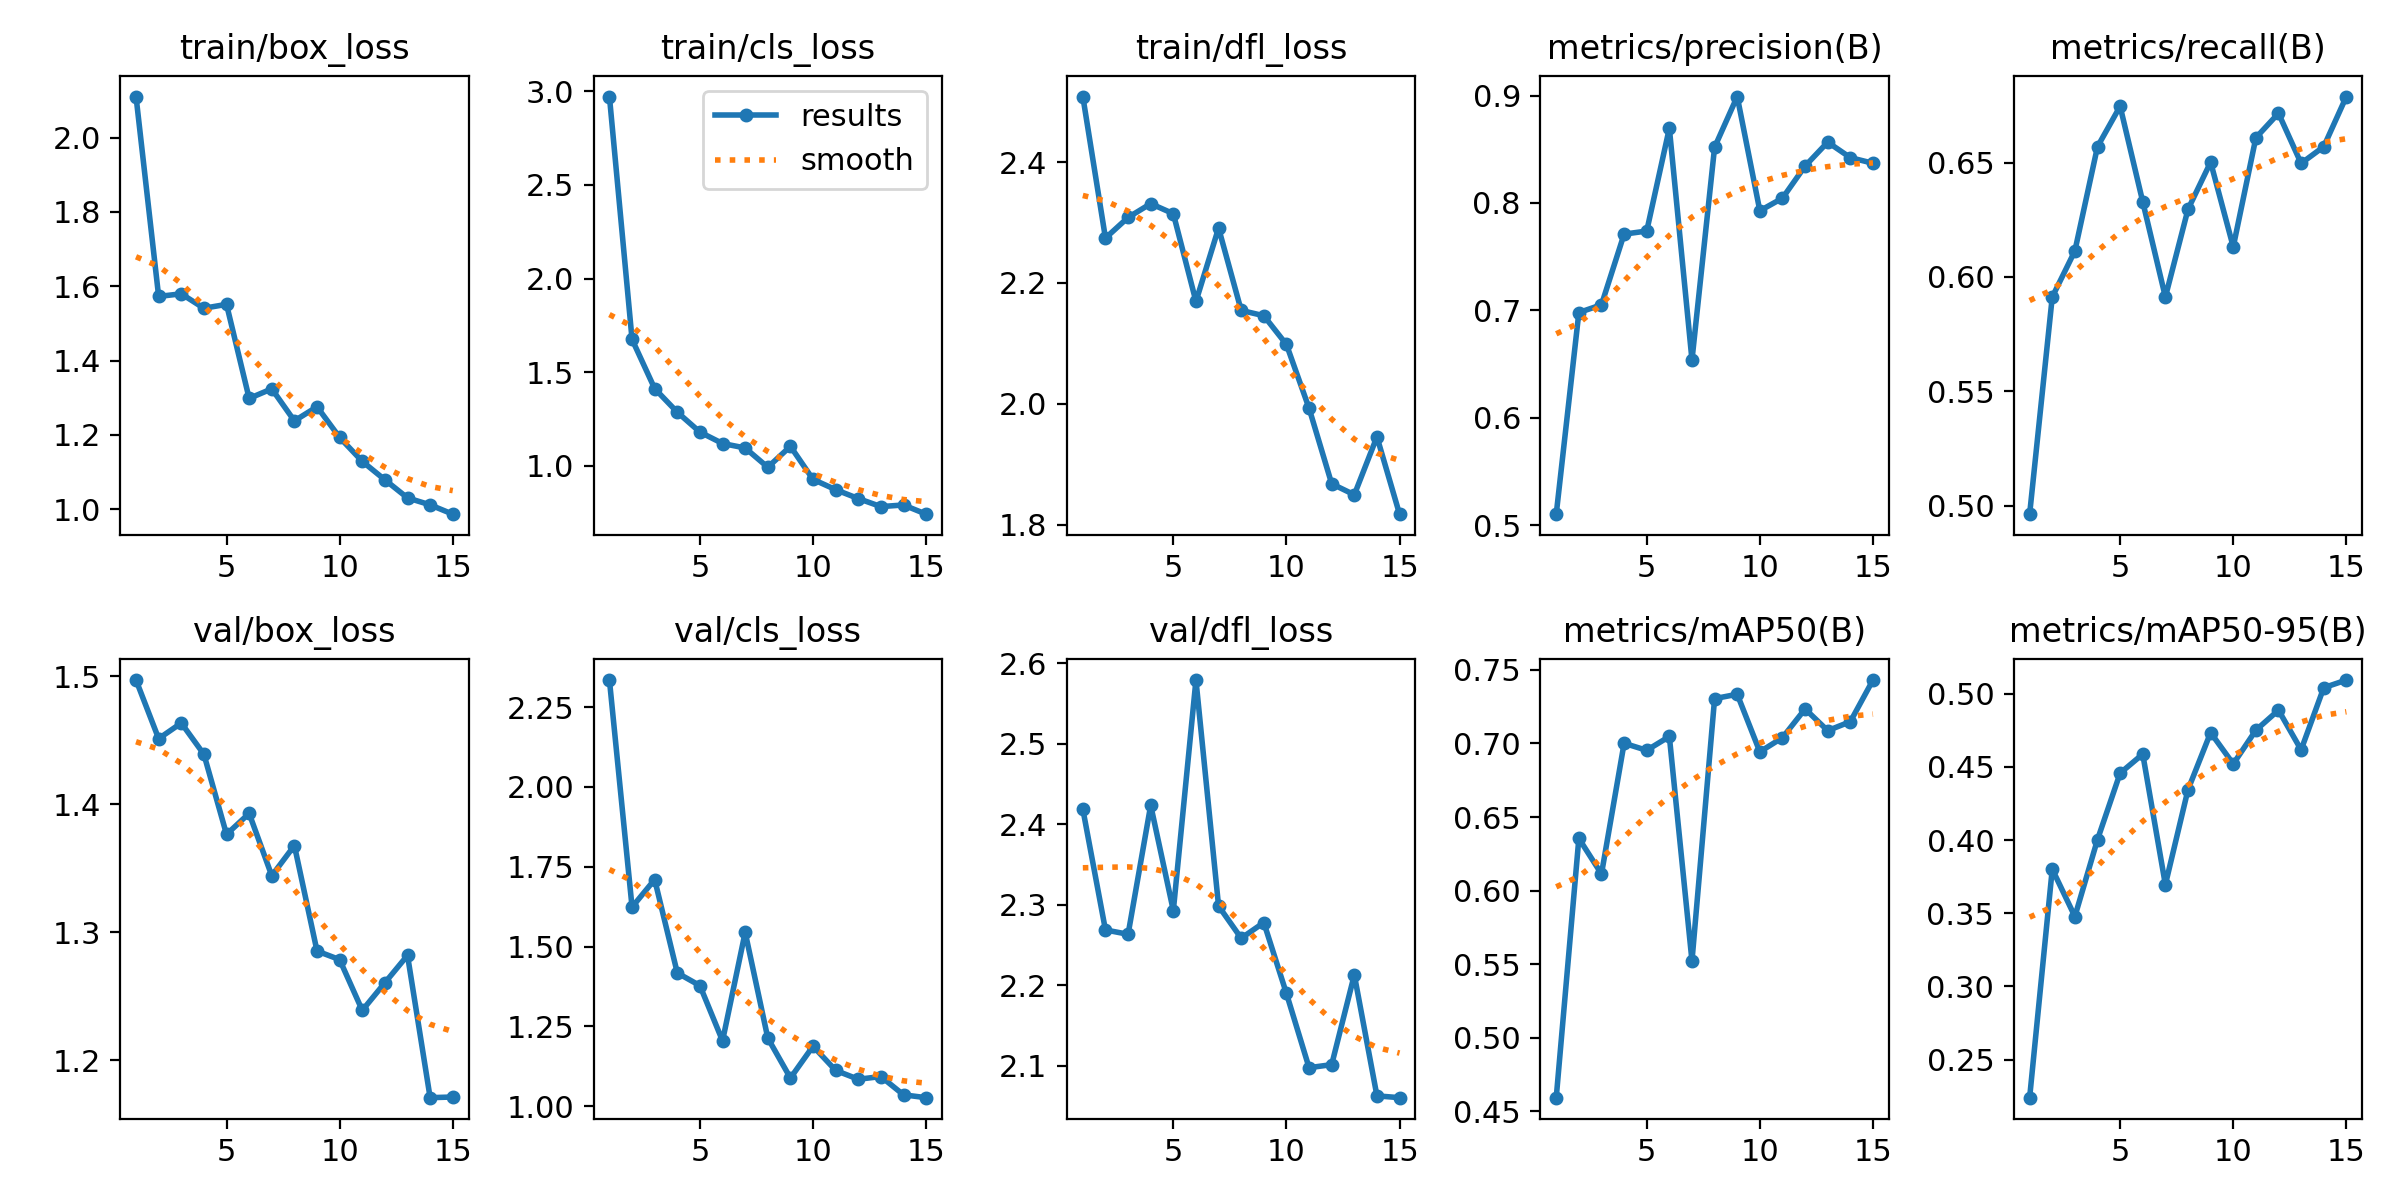

In [ ]:
Image.open("/content/runs/obb/train4/results.png")

In [ ]:
results = model3('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_2.png', save=True)


WARNING ⚠️ OBB task do not support `save_crop`.
image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_2.png: 640x480 15.8ms
Speed: 2.3ms preprocess, 15.8ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/obb/train42


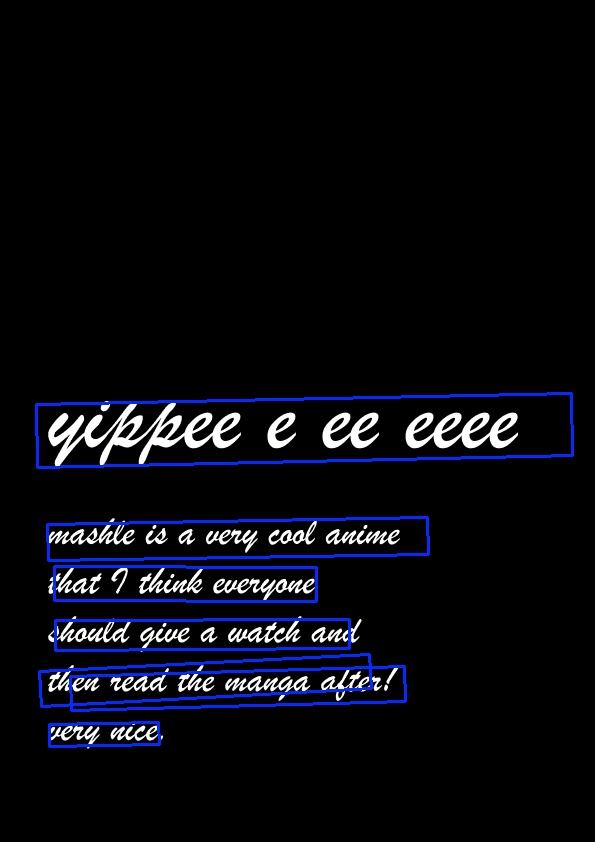

In [ ]:
Image.open("/content/runs/obb/train42/BrushscriptMT$$test_2.jpg")

In [ ]:
model4 = YOLO('yolo11s-obb.pt')

In [ ]:
model4.train(data="/content/config.yaml",epochs=15,patience=5,batch=16, lr0=0.005,imgsz=640, show_labels = False)

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=obb, mode=train, model=yolo11s-obb.pt, data=/content/config.yaml, epochs=15, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=False, show_conf=True, sh

train: Scanning /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/train.cache... 294 images, 0 backgrounds, 3 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train/IMG_1761.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0591]
train: WARNING ⚠️ /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train/IMG_1805.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.015]
train: WARNING ⚠️ /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train/IMG_2029.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0277]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/val.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/obb/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/obb/train5
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      5.29G      2.384      3.244      2.708         18        640: 100%|██████████| 19/19 [00:03<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all         49        137      0.543      0.416       0.43      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      4.96G      1.583      1.933      2.209         18        640: 100%|██████████| 19/19 [00:02<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]

                   all         49        137      0.607      0.591      0.539      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      4.97G      1.603       1.43      2.253         18        640: 100%|██████████| 19/19 [00:02<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.39it/s]

                   all         49        137      0.811      0.642      0.676      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      4.91G      1.482      1.255        2.3         31        640: 100%|██████████| 19/19 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.26it/s]

                   all         49        137      0.642      0.664      0.645      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      4.93G      1.447      1.183      2.256         25        640: 100%|██████████| 19/19 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.18it/s]


                   all         49        137       0.64      0.624      0.634       0.39
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      5.19G      1.269      1.174      2.133          4        640: 100%|██████████| 19/19 [00:04<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.79it/s]

                   all         49        137      0.779      0.672      0.675      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15       4.9G      1.344      1.098      2.185          6        640: 100%|██████████| 19/19 [00:02<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.91it/s]

                   all         49        137      0.734      0.686      0.653      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      4.98G      1.233      1.013      2.149         11        640: 100%|██████████| 19/19 [00:02<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.01it/s]

                   all         49        137      0.852      0.672      0.715      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      4.95G      1.272     0.9876      2.004          5        640: 100%|██████████| 19/19 [00:02<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.03it/s]

                   all         49        137      0.738      0.606      0.623      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      4.95G      1.171     0.8955       2.06          7        640: 100%|██████████| 19/19 [00:02<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.27it/s]

                   all         49        137       0.74      0.672      0.677      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      4.93G      1.115     0.8599      1.976          9        640: 100%|██████████| 19/19 [00:02<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.12it/s]

                   all         49        137        0.8      0.673      0.727      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      4.92G      1.099     0.8146      1.909         14        640: 100%|██████████| 19/19 [00:02<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.60it/s]

                   all         49        137      0.832      0.688       0.72      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      4.94G      1.031     0.7836      1.905          8        640: 100%|██████████| 19/19 [00:02<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.85it/s]

                   all         49        137      0.829      0.672      0.741      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      4.95G      0.972     0.7328       1.77         12        640: 100%|██████████| 19/19 [00:02<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.37it/s]

                   all         49        137      0.844       0.63      0.735      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      4.88G     0.9641     0.7145      1.757         11        640: 100%|██████████| 19/19 [00:02<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.68it/s]

                   all         49        137      0.807       0.62      0.745      0.523



15 epochs completed in 0.020 hours.
Optimizer stripped from runs/obb/train5/weights/last.pt, 19.8MB
Optimizer stripped from runs/obb/train5/weights/best.pt, 19.8MB

Validating runs/obb/train5/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11s-obb summary (fused): 257 layers, 9,699,174 parameters, 0 gradients, 22.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]


                   all         49        137      0.807       0.62      0.745      0.523
Speed: 0.6ms preprocess, 3.1ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/obb/train5


ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e073992df90>
curves: []
curves_results: []
fitness: 0.5453342593943145
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.52315])
names: {0: 'text'}
plot: True
results_dict: {'metrics/precision(B)': 0.8068750871266595, 'metrics/recall(B)': 0.6204379562043796, 'metrics/mAP50(B)': 0.7449836958861048, 'metrics/mAP50-95(B)': 0.5231509886730044, 'fitness': 0.5453342593943145}
save_dir: PosixPath('runs/obb/train5')
speed: {'preprocess': 0.5727446809106944, 'inference': 3.1488720251589406, 'loss': 0.044939469318000635, 'postprocess': 3.4761136891890545}

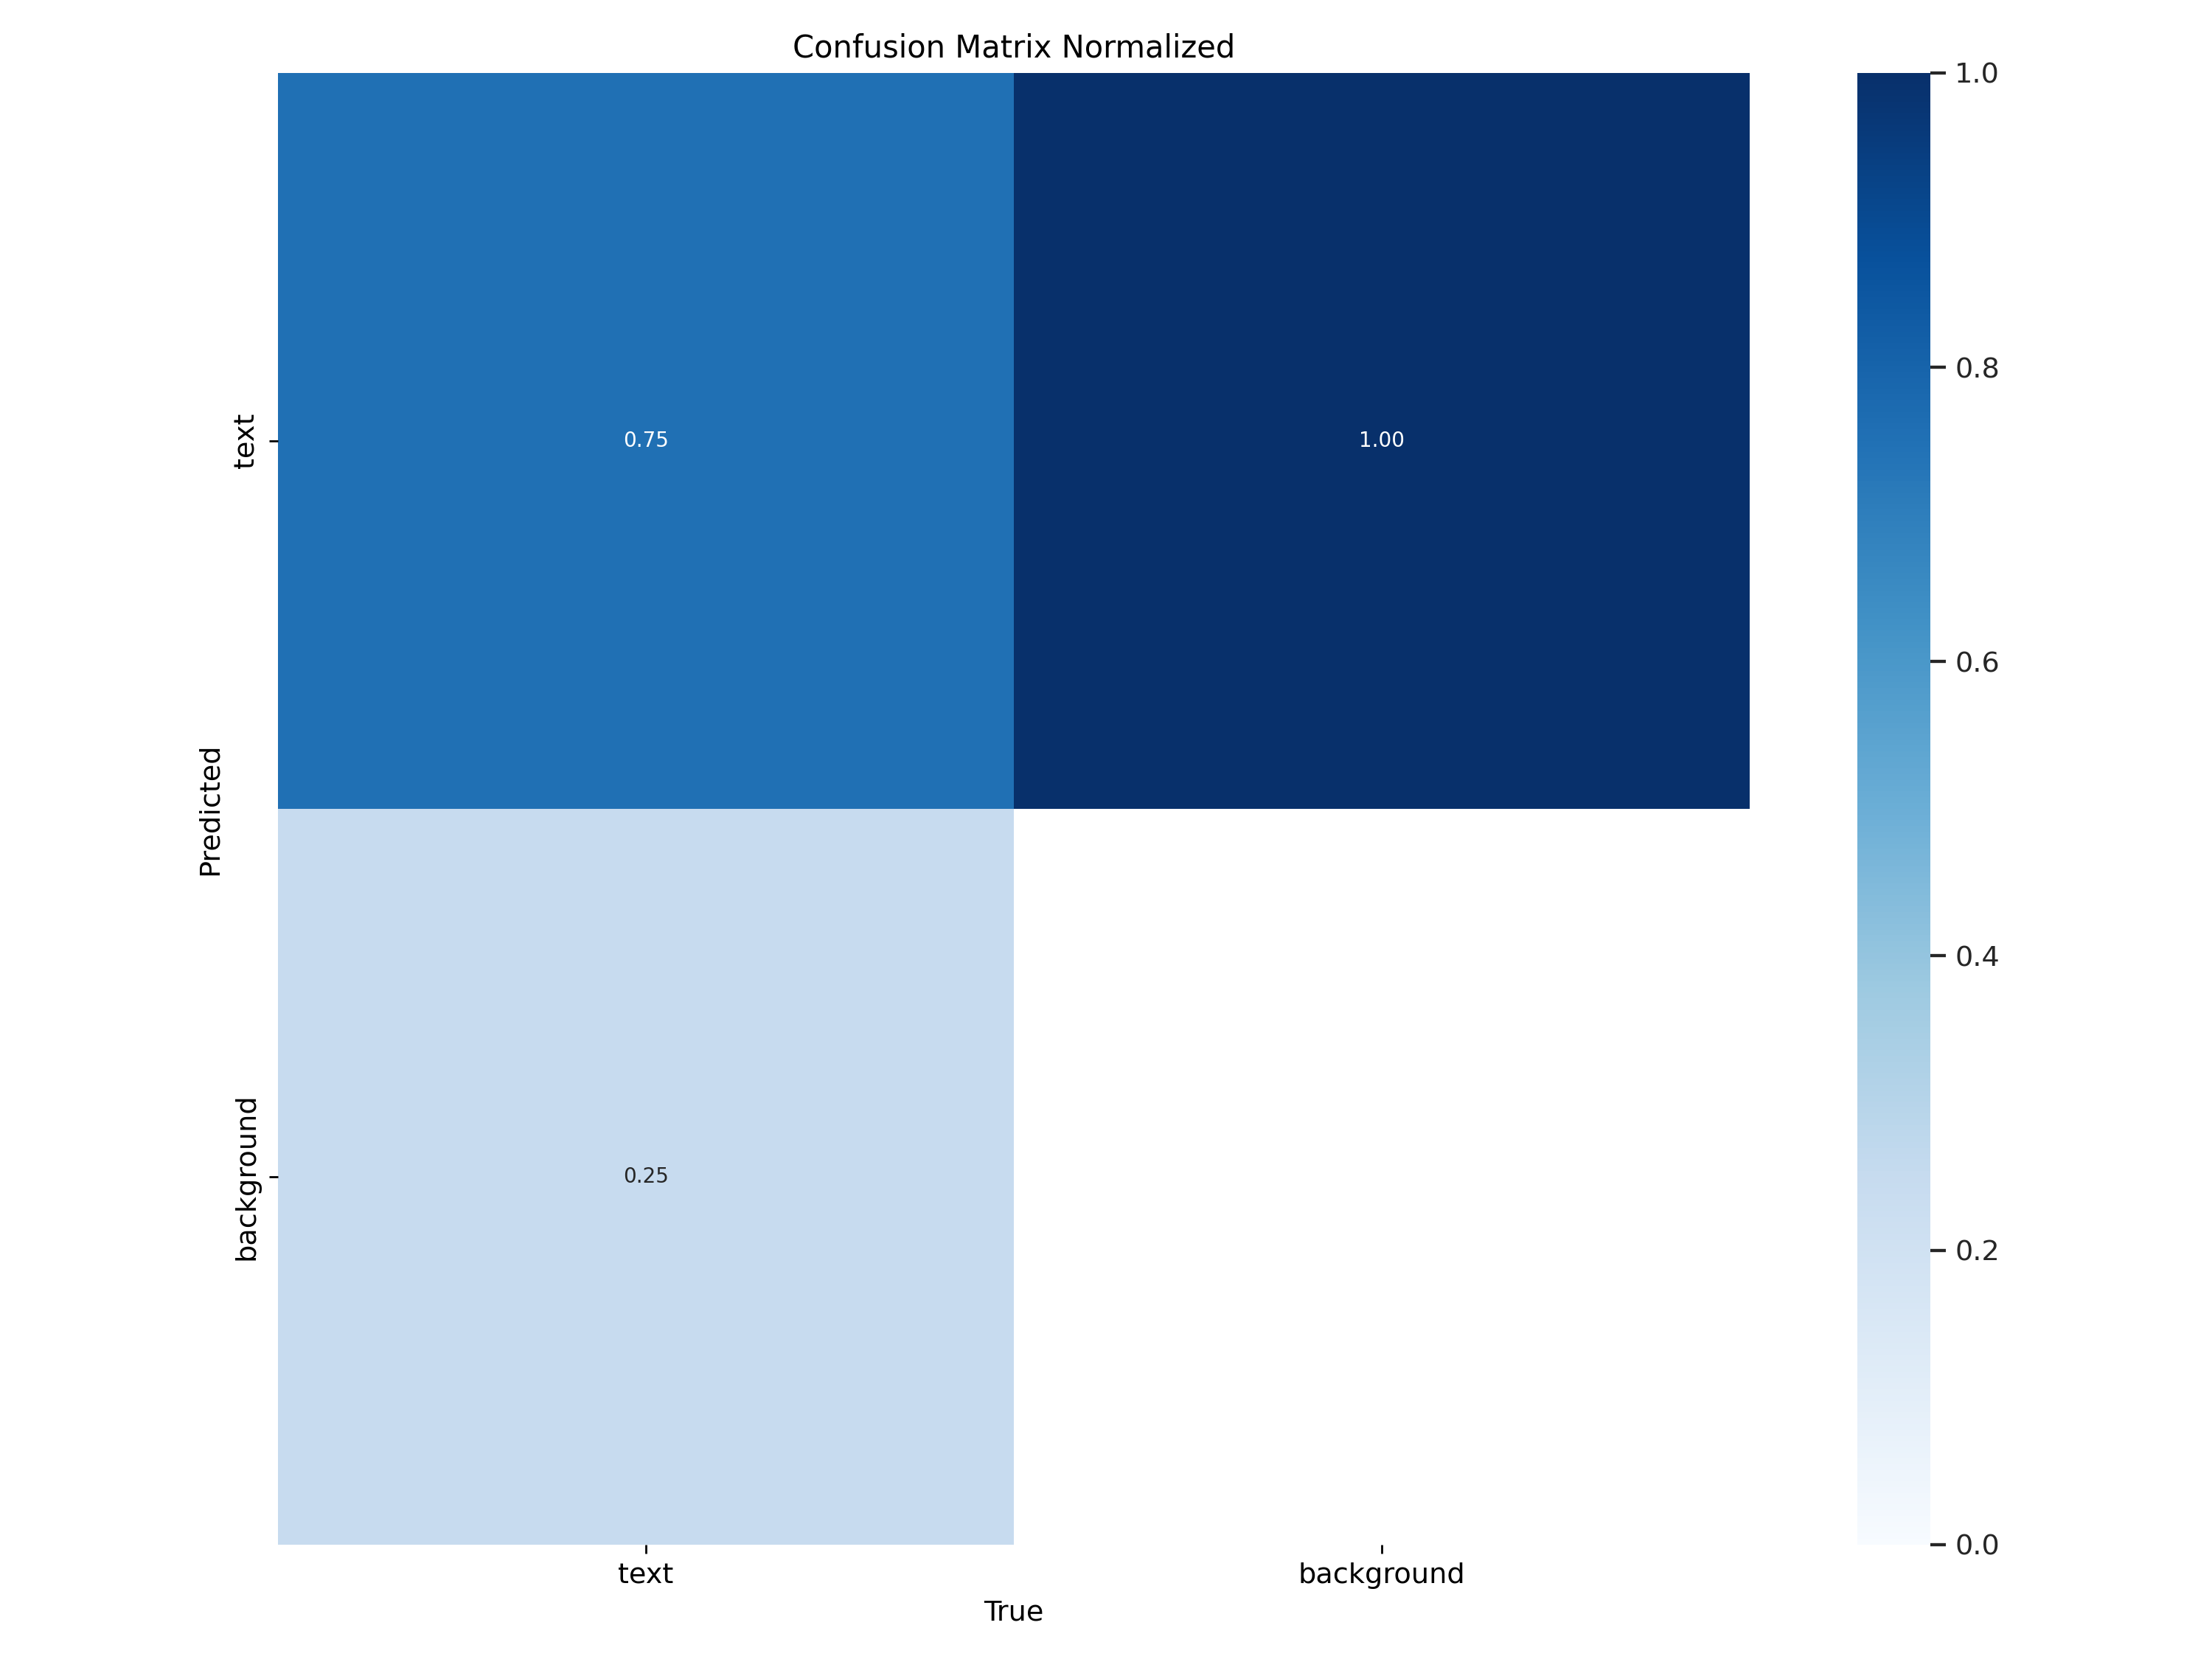

In [ ]:
Image.open("/content/runs/obb/train5/confusion_matrix_normalized.png")

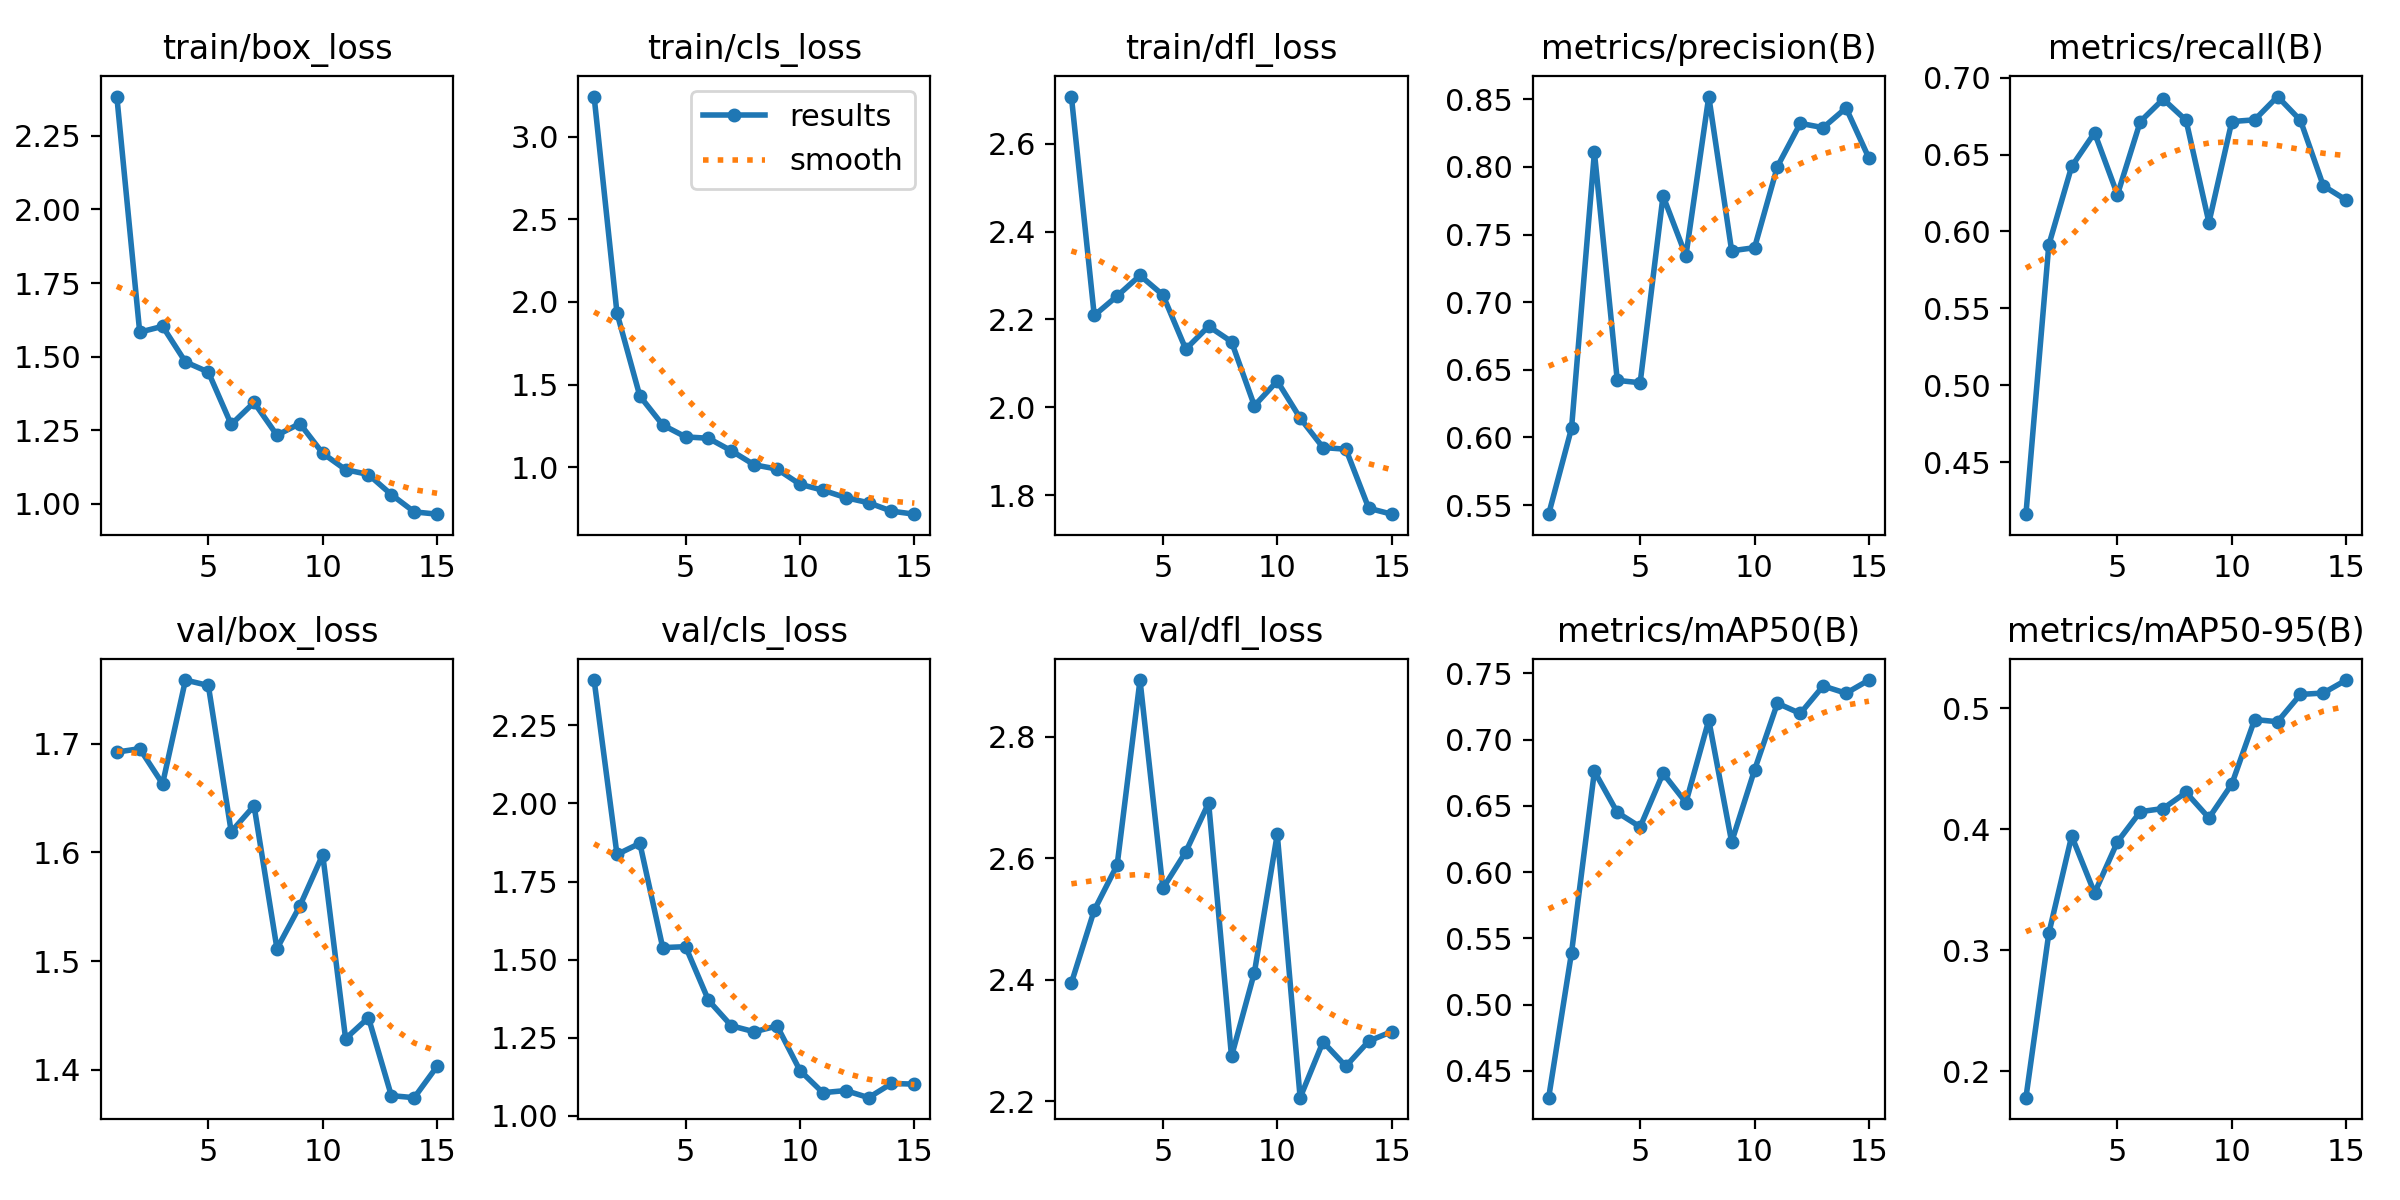

In [ ]:
Image.open("/content/runs/obb/train5/results.png")

In [ ]:
results = model4('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_2.png', save=True)


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_2.png: 640x480 14.4ms
Speed: 3.1ms preprocess, 14.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/obb/train52


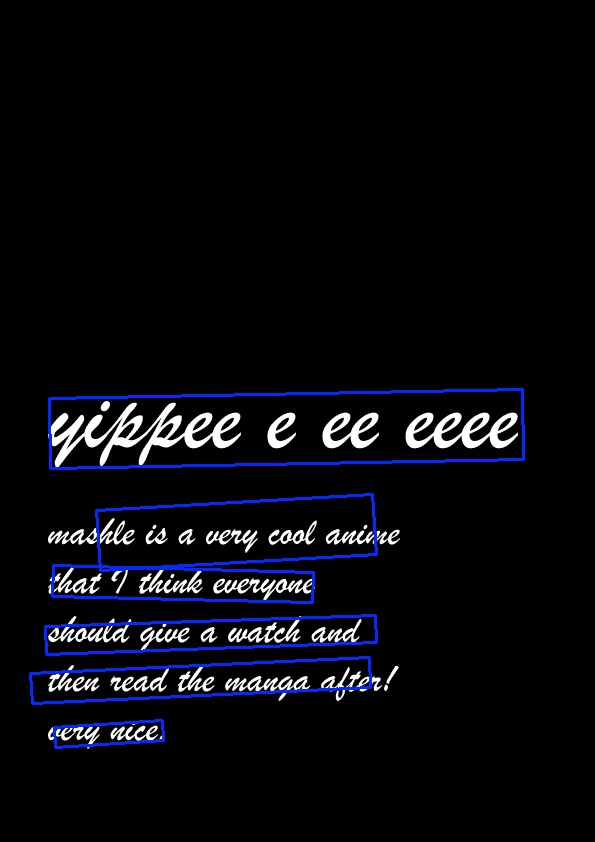

In [ ]:
Image.open("/content/runs/obb/train52/BrushscriptMT$$test_2.jpg")

In [ ]:
results = model4('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_2.png', save=True)


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_2.png: 640x480 12.6ms
Speed: 2.3ms preprocess, 12.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/obb/train53


In [ ]:
# https://www.google.com/url?sa=i&url=https%3A%2F%2Fblog.depositphotos.com%2Finspiration-swiss-style-poster-design.html&psig=AOvVaw2SNQoribJzhF5kjmVnNBYl&ust=1733814155626000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCPiJ7puPmooDFQAAAAAdAAAAABAK
results = model4("/content/drive/MyDrive/IAT 360/Test photos/swissted_04.jpg", save = True)


image 1/1 /content/drive/MyDrive/IAT 360/Test photos/swissted_04.jpg: 640x480 12.7ms
Speed: 2.5ms preprocess, 12.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/obb/train54


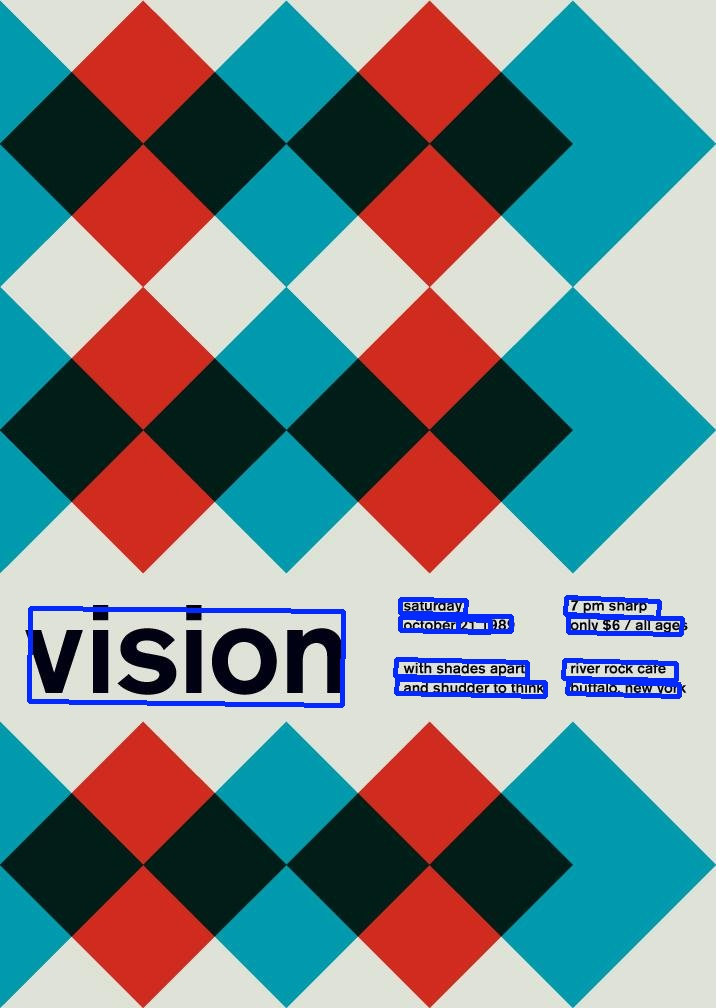

In [ ]:
Image.open("/content/runs/obb/train54/swissted_04.jpg")

In [ ]:
model5 = YOLO('yolo11s-obb.pt')

100%|██████████| 19.0M/19.0M [00:00<00:00, 64.4MB/s]


In [ ]:
model5.train(data="/content/config.yaml",epochs=20,patience=5,batch=16, lr0=0.003,imgsz=640, show_labels = False, single_cls = True, box = 8, show_boxes = False, save_txt = True)

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=obb, mode=train, model=yolo11s-obb.pt, data=/content/config.yaml, epochs=20, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=True, save_conf=False, save_crop=False, show_labels=False, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 6.74MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 353MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/train.cache... 294 images, 0 backgrounds, 3 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train/IMG_1761.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0591]
train: WARNING ⚠️ /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train/IMG_1805.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.015]
train: WARNING ⚠️ /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train/IMG_2029.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0277]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/val.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.003' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/obb/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.56G      2.541      3.246      2.714         18        640: 100%|██████████| 19/19 [00:14<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.37s/it]

                   all         49        137      0.555       0.35      0.396      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.46G      1.679      1.933      2.236         18        640: 100%|██████████| 19/19 [00:02<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.20s/it]

                   all         49        137      0.623       0.59      0.512      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.46G      1.687      1.426      2.257         18        640: 100%|██████████| 19/19 [00:02<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.16s/it]

                   all         49        137      0.751       0.65      0.633      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.41G      1.555      1.232      2.286         31        640: 100%|██████████| 19/19 [00:02<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.15s/it]

                   all         49        137      0.781       0.62      0.687      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.42G      1.534      1.164      2.271         25        640: 100%|██████████| 19/19 [00:02<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]

                   all         49        137      0.624      0.642      0.577      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.41G      1.514      1.077      2.242         16        640: 100%|██████████| 19/19 [00:02<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.51s/it]

                   all         49        137       0.75      0.628      0.689      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       4.4G      1.494      1.079       2.22         11        640: 100%|██████████| 19/19 [00:02<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.35s/it]

                   all         49        137      0.669      0.635      0.638      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.44G      1.478      1.062      2.173         19        640: 100%|██████████| 19/19 [00:02<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.11s/it]

                   all         49        137      0.666      0.627      0.692      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.41G       1.37     0.9793      2.133         23        640: 100%|██████████| 19/19 [00:02<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]

                   all         49        137        0.8      0.555       0.67      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.44G      1.394     0.9767      2.145         14        640: 100%|██████████| 19/19 [00:02<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all         49        137       0.74      0.642      0.678      0.446


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.45G      1.195     0.9032      2.008          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all         49        137      0.833      0.693      0.742      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.41G      1.166     0.8495      1.977         14        640: 100%|██████████| 19/19 [00:02<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all         49        137      0.707      0.701      0.678      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.41G      1.163     0.8017      1.957          8        640: 100%|██████████| 19/19 [00:02<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all         49        137      0.752      0.643      0.677      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.44G      1.105     0.7953      1.878         13        640: 100%|██████████| 19/19 [00:02<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all         49        137      0.649      0.679      0.645      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.39G       1.09     0.7534       1.95         11        640: 100%|██████████| 19/19 [00:02<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all         49        137      0.783      0.679      0.726      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.44G      1.033     0.7432      1.842         14        640: 100%|██████████| 19/19 [00:02<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         49        137      0.713      0.715      0.663      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.41G      1.013     0.6962      1.812         11        640: 100%|██████████| 19/19 [00:02<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all         49        137      0.759      0.635      0.646      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       4.4G      1.011      0.695      1.816          8        640: 100%|██████████| 19/19 [00:02<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all         49        137      0.837      0.584      0.716      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.41G     0.9629     0.6625      1.704         11        640: 100%|██████████| 19/19 [00:02<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all         49        137      0.825       0.62      0.734      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.41G     0.9762     0.6555      1.706         20        640: 100%|██████████| 19/19 [00:02<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all         49        137      0.723      0.686      0.725      0.517



20 epochs completed in 0.048 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 19.8MB
Optimizer stripped from runs/obb/train/weights/best.pt, 19.8MB

Validating runs/obb/train/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11s-obb summary (fused): 257 layers, 9,699,174 parameters, 0 gradients, 22.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]


                   all         49        137      0.824       0.62      0.735      0.519
Speed: 0.5ms preprocess, 1.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/obb/train


ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bcd804ee200>
curves: []
curves_results: []
fitness: 0.5403332464693443
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.51876])
names: {0: 'text'}
plot: True
results_dict: {'metrics/precision(B)': 0.8241561202726251, 'metrics/recall(B)': 0.6204379562043796, 'metrics/mAP50(B)': 0.7345315026044709, 'metrics/mAP50-95(B)': 0.5187556624543302, 'fitness': 0.5403332464693443}
save_dir: PosixPath('runs/obb/train')
speed: {'preprocess': 0.4903686289884606, 'inference': 1.892386650552555, 'loss': 0.0008660919812260841, 'postprocess': 2.342058687793965}

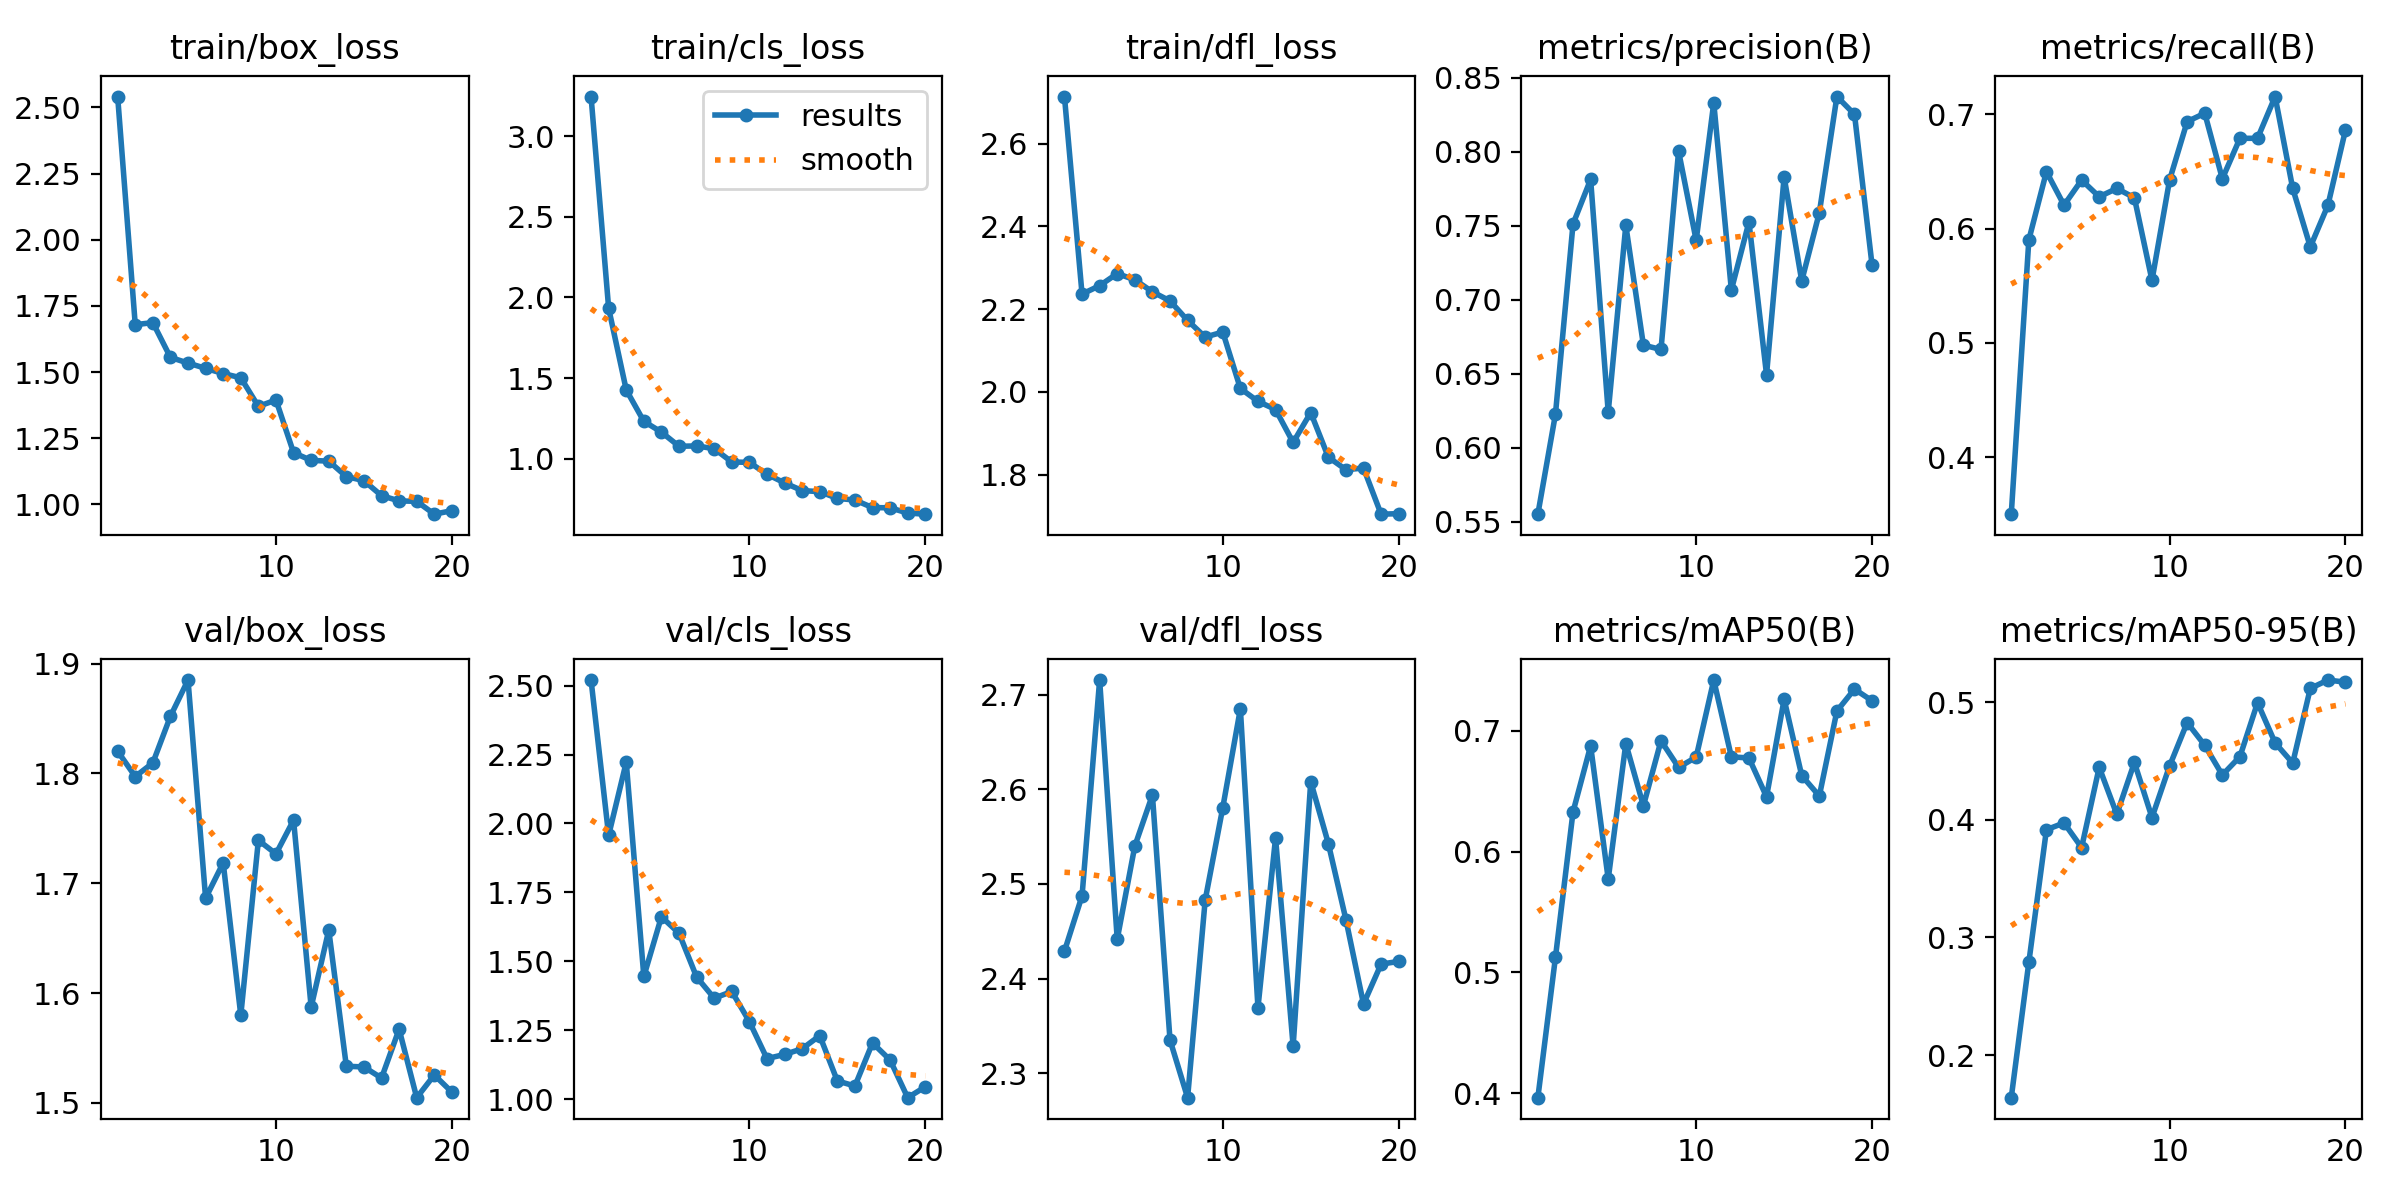

In [ ]:
Image.open("/content/runs/obb/train/results.png")

In [ ]:
results = model5("/content/drive/MyDrive/IAT 360/Test photos/swissted_04.jpg", save = True)


image 1/1 /content/drive/MyDrive/IAT 360/Test photos/swissted_04.jpg: 640x480 13.6ms
Speed: 2.8ms preprocess, 13.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/obb/train3
1 label saved to runs/obb/train3/labels


[(329, 709), (330, 611), (21, 607), (19, 705)]


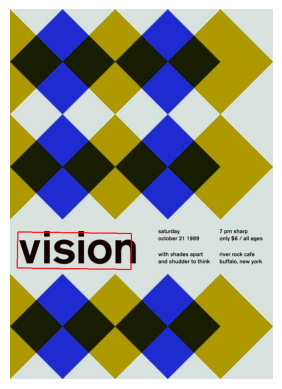

In [ ]:
import math

image = cv2.imread("/content/runs/obb/train2/swissted_04.jpg")
# Draw rectangle
normalized = [
    [0.45988, 0.70345],
    [0.461611, 0.606218],
    [0.0293407, 0.602335],
    [0.0276098, 0.699572],
]

height, width, _ = image.shape
coords = [(int(x*width), int(y*height)) for x, y in normalized]
print(coords)
coords = np.array(coords, dtype = np.int32).reshape((-1, 1, 2))
cv2.polylines(image, [coords], isClosed=True, color=(255, 0, 0), thickness=2)
# Display image
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
finalmodel = YOLO('yolo11s-obb.pt')

Using parameters from model 4 that gave better results but changing label settings

In [ ]:
finalmodel.train(data="/content/config.yaml",epochs=15,patience=5,batch=16, lr0=0.005,imgsz=640, show_labels = False, single_cls = True, show_boxes = False, save_txt = True)

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=obb, mode=train, model=yolo11s-obb.pt, data=/content/config.yaml, epochs=15, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=True, save_conf=False, save_crop=False, show_labels=False, show_conf=True, show

train: Scanning /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/train.cache... 294 images, 0 backgrounds, 3 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train/IMG_1761.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0591]
train: WARNING ⚠️ /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train/IMG_1805.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.015]
train: WARNING ⚠️ /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/images/train/IMG_2029.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0277]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Final Project Transferred/Final Project/Detection Dataset/MSRA-TD500/Detection Data/labels/val.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/obb/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/obb/train3
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      4.62G      2.541      3.246      2.714         18        640: 100%|██████████| 19/19 [00:03<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.21s/it]

                   all         49        137      0.555       0.35      0.396      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      4.51G      1.676      1.936      2.233         18        640: 100%|██████████| 19/19 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.18s/it]

                   all         49        137      0.629      0.577      0.519      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15       4.5G      1.681      1.421      2.257         18        640: 100%|██████████| 19/19 [00:02<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.17s/it]

                   all         49        137       0.73      0.652      0.642      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      4.46G      1.547      1.237      2.259         31        640: 100%|██████████| 19/19 [00:02<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.14s/it]

                   all         49        137      0.746      0.686      0.716      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      4.48G       1.53      1.176       2.27         25        640: 100%|██████████| 19/19 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.92s/it]

                   all         49        137      0.676       0.65      0.625      0.382


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15       4.5G      1.352      1.161      2.171          4        640: 100%|██████████| 19/19 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.67s/it]

                   all         49        137      0.752      0.641      0.651      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      4.47G      1.459      1.185      2.199          6        640: 100%|██████████| 19/19 [00:02<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.88s/it]

                   all         49        137      0.698      0.613      0.637      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      4.52G      1.294       1.03      2.119         11        640: 100%|██████████| 19/19 [00:02<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]

                   all         49        137      0.856      0.635      0.709      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      4.48G      1.327     0.9618      2.086          5        640: 100%|██████████| 19/19 [00:02<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all         49        137      0.657      0.708      0.656      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      4.49G       1.25     0.9062      2.083          7        640: 100%|██████████| 19/19 [00:02<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all         49        137      0.746      0.613      0.706       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      4.47G      1.182     0.8512      2.006          9        640: 100%|██████████| 19/19 [00:02<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all         49        137      0.776      0.632      0.721      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      4.45G      1.119     0.7941      1.883         14        640: 100%|██████████| 19/19 [00:02<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all         49        137      0.831      0.613      0.736      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      4.48G      1.056     0.7471      1.848          8        640: 100%|██████████| 19/19 [00:02<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         49        137      0.831      0.635       0.74      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      4.48G      1.024     0.7269      1.732         12        640: 100%|██████████| 19/19 [00:02<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all         49        137      0.912      0.599      0.758      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      4.43G      1.006     0.6979      1.731         11        640: 100%|██████████| 19/19 [00:02<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all         49        137      0.933      0.613      0.754       0.53



15 epochs completed in 0.039 hours.
Optimizer stripped from runs/obb/train3/weights/last.pt, 19.8MB
Optimizer stripped from runs/obb/train3/weights/best.pt, 19.8MB

Validating runs/obb/train3/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11s-obb summary (fused): 257 layers, 9,699,174 parameters, 0 gradients, 22.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]


                   all         49        137      0.933      0.613      0.754      0.529
Speed: 0.4ms preprocess, 1.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/obb/train3


ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d062c2612d0>
curves: []
curves_results: []
fitness: 0.5516740433767673
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.52915])
names: {0: 'text'}
plot: True
results_dict: {'metrics/precision(B)': 0.9332770407323443, 'metrics/recall(B)': 0.6125901414429166, 'metrics/mAP50(B)': 0.7543680542244835, 'metrics/mAP50-95(B)': 0.52915248661591, 'fitness': 0.5516740433767673}
save_dir: PosixPath('runs/obb/train3')
speed: {'preprocess': 0.4209255685611647, 'inference': 1.7929223118996134, 'loss': 0.0008514949253627232, 'postprocess': 2.0210937577850965}

In [ ]:
finalmodel = YOLO ("/content/runs/obb/train2/weights/best.pt")

In [ ]:
results = finalmodel("/content/drive/MyDrive/IAT 360/Test photos/swissted_04.jpg", save = True)


image 1/1 /content/drive/MyDrive/IAT 360/Test photos/swissted_04.jpg: 640x480 13.6ms
Speed: 3.0ms preprocess, 13.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/obb/train33
1 label saved to runs/obb/train33/labels


In [ ]:
model = YOLO ("/content/runs/obb/train3/weights/best.pt")

In [ ]:
results = model("/content/drive/MyDrive/IAT 360/Test photos/swissted_04.jpg", save = True)


image 1/1 /content/drive/MyDrive/IAT 360/Test photos/swissted_04.jpg: 640x480 14.2ms
Speed: 4.0ms preprocess, 14.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/obb/predict6


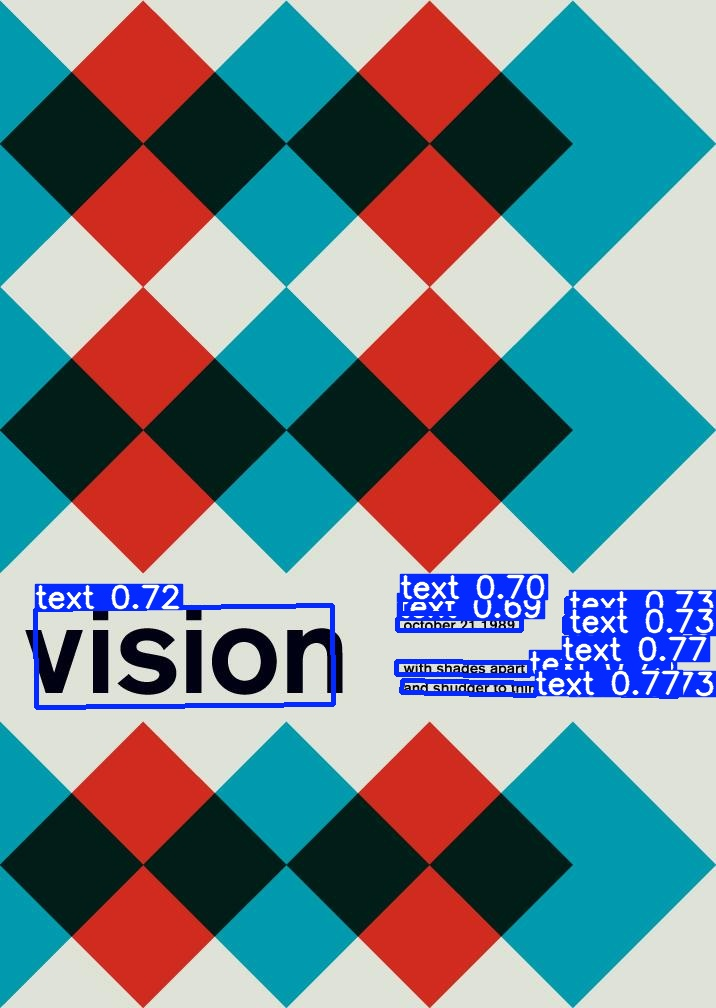

In [ ]:
Image.open("/content/runs/obb/predict6/swissted_04.jpg")

In [ ]:
results = finalmodel("/content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test_1.png", save = True)


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test_1.png: 640x480 13.7ms
Speed: 2.9ms preprocess, 13.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/obb/train34
1 label saved to runs/obb/train34/labels


In [ ]:
boxedresults = model("/content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test_1.png", save = True)


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test_1.png: 640x480 21.6ms
Speed: 4.4ms preprocess, 21.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/obb/predict6


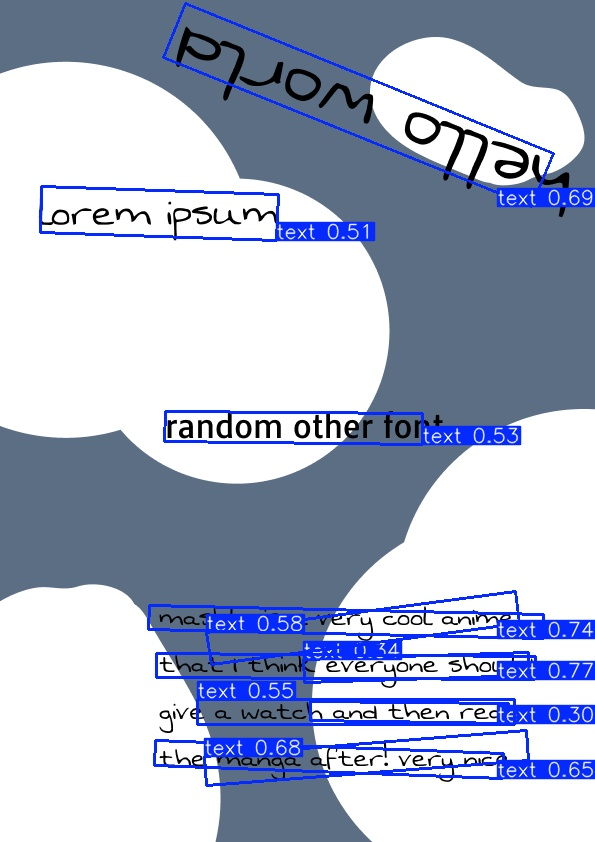

In [ ]:
Image.open("/content/runs/obb/predict6/SwankyandMooMoo$$test_1.jpg")

In [ ]:
modelsaved = YOLO("/content/drive/MyDrive/Final Project Transferred/finalmodel.pt")

In [ ]:
testresults = modelsaved.predict("/content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test_1.png", save = True)


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test_1.png: 640x480 12.9ms
Speed: 2.4ms preprocess, 12.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/obb/predict7


# Pipeline

In [ ]:
det_results = finalmodel.predict("/content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test_1.png")
image = cv2.imread("/content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test_1.png")


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test_1.png: 640x480 12.8ms
Speed: 2.4ms preprocess, 12.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/obb/train36
1 label saved to runs/obb/train36/labels


In [ ]:
print(det_results)

[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'text'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[132, 110,  92],
        [132, 110,  92],
        [132, 110,  92],
        ...,
        [132, 110,  92],
        [132, 110,  92],
        [132, 110,  92]],

       [[132, 110,  92],
        [132, 110,  92],
        [132, 110,  92],
        ...,
        [132, 110,  92],
        [132, 110,  92],
        [132, 110,  92]],

       [[132, 110,  92],
        [132, 110,  92],
        [132, 110,  92],
        ...,
        [132, 110,  92],
        [132, 110,  92],
        [132, 110,  92]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 25

In [ ]:
result = det_results[0]
print(result.obb)

ultralytics.engine.results.OBB object with attributes:

cls: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
conf: tensor([0.7747, 0.7366, 0.6866, 0.6832, 0.6495, 0.5817, 0.5533, 0.5278, 0.5134, 0.3437, 0.2973], device='cuda:0')
data: tensor([[3.4581e+02, 6.6676e+02, 3.7829e+02, 2.3720e+01, 6.1876e-03, 7.7474e-01, 0.0000e+00],
        [3.4641e+02, 6.2186e+02, 3.9464e+02, 2.3710e+01, 2.2451e-02, 7.3658e-01, 0.0000e+00],
        [3.5849e+02, 1.0533e+02, 3.9648e+02, 5.8110e+01, 3.8664e-01, 6.8656e-01, 0.0000e+00],
        [3.6645e+02, 7.5847e+02, 3.2340e+02, 2.9842e+01, 3.0633e+00, 6.8324e-01, 0.0000e+00],
        [3.2905e+02, 7.5945e+02, 3.4844e+02, 2.5163e+01, 3.6994e-02, 6.4945e-01, 0.0000e+00],
        [3.6309e+02, 6.2800e+02, 3.1086e+02, 3.2407e+01, 3.0092e+00, 5.8167e-01, 0.0000e+00],
        [3.5579e+02, 7.1203e+02, 3.1664e+02, 2.5653e+01, 3.1411e+00, 5.5327e-01, 0.0000e+00],
        [2.9371e+02, 4.2787e+02, 2.5722e+02, 3.0171e+01, 8.4422e-03, 5.2780e-01, 0.00

In [ ]:
finalmodel = YOLO("/content/runs/obb/train3/weights/thefinalmodel.pt")

In [ ]:
results = finalmodel("/content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test_1.png")


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test_1.png: 640x480 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/obb/predict9


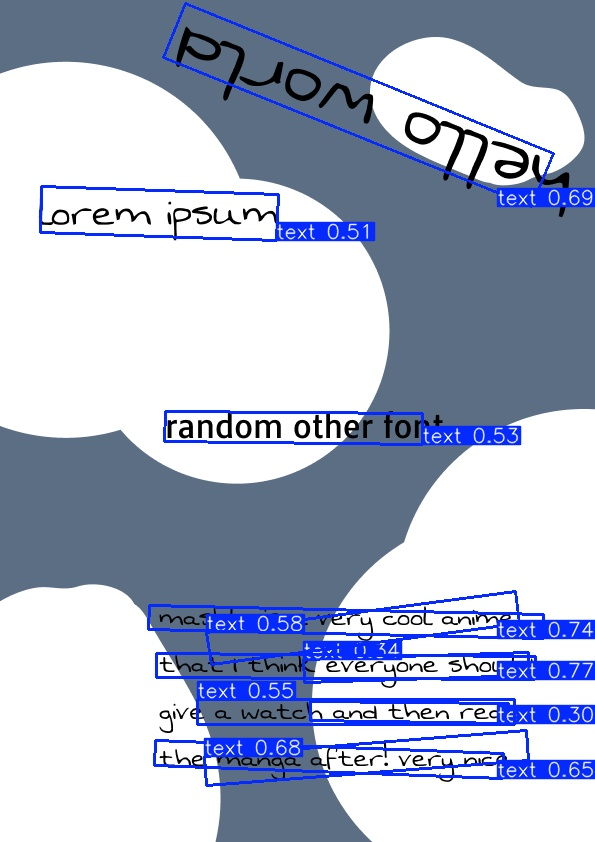

In [ ]:
Image.open("/content/runs/obb/predict9/SwankyandMooMoo$$test_1.jpg")

# Crop images from detection model

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


In [ ]:
det_model = YOLO("/content/drive/MyDrive/Final Project Transferred/thefinalmodel.pt")

In [ ]:
file_path = "/content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test_1.png"

In [ ]:
results = det_model(file_path)


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test_1.png: 640x480 676.4ms
Speed: 18.3ms preprocess, 676.4ms inference, 59.6ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
obss = results[0].obb.xyxyxyxy.tolist()

In [ ]:
print(obss)

[[[534.8663330078125, 679.7842407226562], [535.0135498046875, 656.0686645507812], [156.74526977539062, 653.7202758789062], [156.59805297851562, 677.4358520507812]], [[543.4083862304688, 638.1419067382812], [543.9404907226562, 614.4425659179688], [149.39974975585938, 605.5841674804688], [148.86764526367188, 629.2835083007812]], [[531.146484375, 206.98614501953125], [553.052978515625, 153.17364501953125], [185.84056091308594, 3.68505859375], [163.9340057373047, 57.49757385253906]], [[204.0631561279297, 756.2539672851562], [206.39695739746094, 785.9951782226562], [528.8242797851562, 760.6942749023438], [526.4905395507812, 730.9530639648438]], [[502.6839599609375, 778.4634399414062], [503.61474609375, 753.3235473632812], [155.40707397460938, 740.4310913085938], [154.47625732421875, 765.5709838867188]], [[206.9365692138672, 632.4786376953125], [211.22349548339844, 664.615234375], [519.257080078125, 623.5245361328125], [514.97021484375, 591.387939453125]], [[197.45535278320312, 699.314758300

In [ ]:
image_path = results[0].path
image = cv2.imread(image_path)

In [ ]:
def get_outer(obb_data, w, h):
  x_min, y_min = w, h
  x_max, y_max = 0, 0

  for point in obb_data:
    x, y = point
    x_min = min(x_min, x)
    y_min = min(y_min, y)
    x_max = max(x_max, x)
    y_max = max(y_max, y)

  return int(x_min), int(y_min), int(x_max), int(y_max)


In [ ]:
def overlapping(box1, box2):
  x1_min, y1_min = box1[0]
  x1_max, y1_max = box1[1]

  x2_min, y2_min = box2[0]
  x2_max, y2_max = box2[1]

  if(x1_min < x2_max and x1_max > x2_min) and (y1_min < y2_max and y1_max > y2_min):
    return True

  return False

In [ ]:
def merge(boxes):
  merged_boxes = []

  while boxes:
    # remove first box from the list and process it
    box1 = boxes.pop(0)
    merged = False

    for i, box2 in enumerate(boxes):
      if(overlapping(box1, box2)):
        x1_min, y1_min = box1[0]
        x1_max, y1_max = box1[1]

        x2_min, y2_min = box2[0]
        x2_max, y2_max = box2[1]

        # new box
        box = [
            (min(x1_min, x2_min), min(y1_min, y2_min)),
            (max(x1_max, x2_max), min(y1_max, y2_max)),
        ]

        boxes[i] = box
        merged = True
        break
    if not merged:
      merged_boxes.append(box1)

  return merged_boxes

In [ ]:
def crop_img(img, boxes, w, h):
  cropped_imgs = []

  for box in boxes:
    (x_min, y_min), (x_max, y_max) = box

    threshold = 8
    x_min -= threshold
    y_min -= threshold
    x_max += threshold
    y_max += threshold

    x_min = max(0, x_min)
    y_min = max(0, y_min)
    x_max = min(w, x_max)
    y_max = min(h, y_max)

    cropped_img = image[int(y_min):int(y_max), int(x_min):int(x_max)]
    cropped_imgs.append(cropped_img)

  return cropped_imgs

In [ ]:
width = image.shape[1]
height = image.shape[0]
name = os.path.splitext(os.path.basename(file_path))[0]
coords = []

for i, bbox in enumerate(obss):
  x_min, y_min, x_max, y_max = get_outer(bbox, width, height)
  coords.append([(x_min, y_min), (x_max, y_max)])

In [ ]:
merged = merge(coords)
cropped = crop_img(image, merged, width, height)
all_img_paths = []

for i, cropped_img in enumerate(cropped):
  cv2.imwrite(name + f'_{i}.jpg', cropped_img)
  all_img_paths.append('/content/' + name + f'_{i}.jpg')
  print("working")


working
working
working
working
working
working


In [ ]:
print(all_img_paths)
print()

['/content/SwankyandMooMoo$$test_1_0.jpg', '/content/SwankyandMooMoo$$test_1_1.jpg', '/content/SwankyandMooMoo$$test_1_2.jpg', '/content/SwankyandMooMoo$$test_1_3.jpg', '/content/SwankyandMooMoo$$test_1_4.jpg', '/content/SwankyandMooMoo$$test_1_5.jpg']



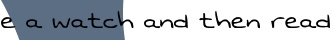

In [ ]:
Image.open(all_img_paths[5])

# Final Pipeline

In [ ]:
#get the detection model
det_model = YOLO("/content/drive/MyDrive/Final Project Transferred/thefinalmodel.pt")

In [ ]:
#when using model, this is the part to change
file_path = "/content/drive/MyDrive/Final Project Transferred/Testing Images/didot_poster.png"

In [ ]:
#combined piece of code to get cropped images and list of their paths
#get the predicted boxes
results = det_model(file_path)
#get the coordinates of the bounding boxes
obss = results[0].obb.xyxyxyxy.tolist()
#load the original image
image_path = results[0].path
image = cv2.imread(image_path)
#get the width and height of the image
width = image.shape[1]
height = image.shape[0]
#get the image name
name = os.path.splitext(os.path.basename(file_path))[0]
#create a list of the all the bounding box coordinates
coords = []
#go through the bounding boxes and find the top left, and bottom right coordinate
for i, bbox in enumerate(obss):
  x_min, y_min, x_max, y_max = get_outer(bbox, width, height)
  coords.append([(x_min, y_min), (x_max, y_max)])
#merge bounding boxes that overlap
merged = merge(coords)
#get the coordinates to crop the image
cropped = crop_img(image, merged, width, height)
#list to keep file paths to feed into next model
all_img_paths = []
#creating the files
for i, cropped_img in enumerate(cropped):
  cv2.imwrite('/content/Cropped Images/' + name + f'_{i}.jpg', cropped_img)
  all_img_paths.append('/content/Cropped Images/' + name + f'_{i}.jpg')
  print("Created cropped file: " + '/content/Cropped Images/' + name + f'_{i}.jpg')


image 1/1 /content/drive/MyDrive/Final Project Transferred/Testing Images/didot_poster.png: 640x416 606.0ms
Speed: 5.6ms preprocess, 606.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 416)
Created cropped file: /content/Cropped Images/didot_poster_0.jpg
Created cropped file: /content/Cropped Images/didot_poster_1.jpg
Created cropped file: /content/Cropped Images/didot_poster_2.jpg
Created cropped file: /content/Cropped Images/didot_poster_3.jpg
Created cropped file: /content/Cropped Images/didot_poster_4.jpg
Created cropped file: /content/Cropped Images/didot_poster_5.jpg
Created cropped file: /content/Cropped Images/didot_poster_6.jpg
Created cropped file: /content/Cropped Images/didot_poster_7.jpg


# Feeding into the classification model

In [ ]:
#resize the images before putting into the model, model was trained with imgsz 640 so this is what they will be scaled to

def scale(file_paths, output_folder, size):
  scaled_image_paths = []

  for file_dir in file_paths:
    file_name = os.path.basename(file_dir)
    output_path = os.path.join(output_folder, file_name)

    with Image.open(file_dir) as img:
      img_resized = img.resize(size)
      img_resized.save(output_path)
      scaled_image_paths.append(output_path)

  return scaled_image_paths

In [ ]:
output_dir = "/content/Resized Images"
size = (640,640)
scaled_images_paths = scale(all_img_paths, output_dir, size)

In [ ]:
clsmodel = YOLO("/content/drive/MyDrive/Final Project Transferred/classmodel.pt")

In [ ]:
clsresults = clsmodel(scaled_images_paths[0])

100%|██████████| 755k/755k [00:00<00:00, 13.9MB/s]

image 1/1 /content/Resized Images/SwankyandMooMoo$$test_1_0.jpg: 640x640 Futura 0.75, Helvetica 0.21, Didot 0.04, Candara 0.00, News Gothic 0.00, 1050.0ms
Speed: 39.5ms preprocess, 1050.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict


In [ ]:
cls_unscaled_results = clsmodel(all_img_paths[0])


image 1/1 /content/SwankyandMooMoo$$test_1_0.jpg: 640x640 Courier 0.61, Calvin 0.16, Candara 0.03, Californian FB 0.03, LCD Mono 0.02, 702.9ms
Speed: 111.5ms preprocess, 702.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
for font_img in scaled_images_paths:
  clsmodel(font_img)


image 1/1 /content/Resized Images/didot_poster_0.jpg: 640x640 Helvetica 0.74, Futura 0.17, Didot 0.09, Candara 0.00, Myriad 0.00, 295.7ms
Speed: 14.0ms preprocess, 295.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Resized Images/didot_poster_1.jpg: 640x640 Didot 1.00, Helvetica 0.00, Futura 0.00, News Gothic 0.00, Candara 0.00, 278.1ms
Speed: 9.6ms preprocess, 278.1ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Resized Images/didot_poster_2.jpg: 640x640 Helvetica 0.49, Futura 0.48, Didot 0.03, Candara 0.00, Myriad 0.00, 264.6ms
Speed: 9.4ms preprocess, 264.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Resized Images/didot_poster_3.jpg: 640x640 Didot 1.00, Helvetica 0.00, Futura 0.00, Candara 0.00, Myriad 0.00, 289.2ms
Speed: 9.7ms preprocess, 289.2ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Resized Images/didot_poste

In [ ]:
for font_img in all_img_paths:
  clsmodel(font_img)


image 1/1 /content/Cropped Images/didot_poster_0.jpg: 640x640 Futura 0.85, Didot 0.11, Helvetica 0.04, Steppes TT 0.00, Myriad 0.00, 274.9ms
Speed: 34.5ms preprocess, 274.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Cropped Images/didot_poster_1.jpg: 640x640 Didot 1.00, Futura 0.00, Helvetica 0.00, Bodoni 0.00, Akzidenz Grotesk 0.00, 278.9ms
Speed: 37.3ms preprocess, 278.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Cropped Images/didot_poster_2.jpg: 640x640 Didot 0.89, Futura 0.10, Helvetica 0.01, Candara 0.00, Myriad 0.00, 264.4ms
Speed: 64.0ms preprocess, 264.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Cropped Images/didot_poster_3.jpg: 640x640 Didot 1.00, Helvetica 0.00, Futura 0.00, Candara 0.00, Myriad 0.00, 273.6ms
Speed: 16.4ms preprocess, 273.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Cropped Images/d

In [ ]:
#based on this test, it works best on unscaled images
#the model already scales it when classifying so we don't need the extra step

# Combining all the code into a function

In [ ]:
def identify_font(img_path, scale_img):
  #combined piece of code to get cropped images and list of their paths
  #get the predicted boxes
  results = det_model(img_path)
  #get the coordinates of the bounding boxes
  obss = results[0].obb.xyxyxyxy.tolist()
  #load the original image
  image_path = results[0].path
  image = cv2.imread(img_path)
  #get the width and height of the image
  width = image.shape[1]
  height = image.shape[0]
  #get the image name
  name = os.path.splitext(os.path.basename(img_path))[0]
  #create a list of the all the bounding box coordinates
  coords = []
  #go through the bounding boxes and find the top left, and bottom right coordinate
  for i, bbox in enumerate(obss):
    x_min, y_min, x_max, y_max = get_outer(bbox, width, height)
    coords.append([(x_min, y_min), (x_max, y_max)])
  #merge bounding boxes that overlap
  merged = merge(coords)
  #get the coordinates to crop the image
  cropped = crop_img(image, merged, width, height)
  #list to keep file paths to feed into next model
  all_img_paths = []
  #creating the files
  for i, cropped_img in enumerate(cropped):
    cv2.imwrite('/content/Cropped Images/' + name + f'_{i}.jpg', cropped_img)
    all_img_paths.append('/content/Cropped Images/' + name + f'_{i}.jpg')
    print("Created cropped file: " + '/content/Cropped Images/' + name + f'_{i}.jpg')

  if scale_img:
    output_dir = "/content/Resized Images"
    size = (640,640)
    scaled_images_paths = scale(all_img_paths, output_dir, size)

    for font_img in scaled_images_paths:
      clsmodel(font_img)
  else:
    for font_img in all_img_paths:
      clsmodel(font_img)

# Before using, run everything in here

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


In [ ]:
def get_outer(obb_data, w, h):
  x_min, y_min = w, h
  x_max, y_max = 0, 0

  for point in obb_data:
    x, y = point
    x_min = min(x_min, x)
    y_min = min(y_min, y)
    x_max = max(x_max, x)
    y_max = max(y_max, y)

  return int(x_min), int(y_min), int(x_max), int(y_max)

def overlapping(box1, box2):
  x1_min, y1_min = box1[0]
  x1_max, y1_max = box1[1]

  x2_min, y2_min = box2[0]
  x2_max, y2_max = box2[1]

  if(x1_min < x2_max and x1_max > x2_min) and (y1_min < y2_max and y1_max > y2_min):
    return True

  return False

def merge(boxes):
  merged_boxes = []

  while boxes:
    # remove first box from the list and process it
    box1 = boxes.pop(0)
    merged = False

    for i, box2 in enumerate(boxes):
      if(overlapping(box1, box2)):
        x1_min, y1_min = box1[0]
        x1_max, y1_max = box1[1]

        x2_min, y2_min = box2[0]
        x2_max, y2_max = box2[1]

        # new box
        box = [
            (min(x1_min, x2_min), min(y1_min, y2_min)),
            (max(x1_max, x2_max), min(y1_max, y2_max)),
        ]

        boxes[i] = box
        merged = True
        break
    if not merged:
      merged_boxes.append(box1)

  return merged_boxes

def crop_img(img, boxes, w, h):
  cropped_imgs = []

  for box in boxes:
    (x_min, y_min), (x_max, y_max) = box

    threshold = 8
    x_min -= threshold
    y_min -= threshold
    x_max += threshold
    y_max += threshold

    x_min = max(0, x_min)
    y_min = max(0, y_min)
    x_max = min(w, x_max)
    y_max = min(h, y_max)

    cropped_img = img[int(y_min):int(y_max), int(x_min):int(x_max)]
    cropped_imgs.append(cropped_img)

  return cropped_imgs

def scale(file_paths, output_folder, size):
  scaled_image_paths = []

  for file_dir in file_paths:
    file_name = os.path.basename(file_dir)
    output_path = os.path.join(output_folder, file_name)

    with Image.open(file_dir) as img:
      img_resized = img.resize(size)
      img_resized.save(output_path)
      scaled_image_paths.append(output_path)

  return scaled_image_paths

def identify_font(img_path, scale_img):
  #combined piece of code to get cropped images and list of their paths
  #get the predicted boxes
  results = det_model(img_path)
  #get the coordinates of the bounding boxes
  obss = results[0].obb.xyxyxyxy.tolist()
  #load the original image
  image_path = results[0].path
  image = cv2.imread(image_path)
  #get the width and height of the image
  width = image.shape[1]
  height = image.shape[0]
  #get the image name
  name = os.path.splitext(os.path.basename(img_path))[0]
  #create a list of the all the bounding box coordinates
  coords = []
  #go through the bounding boxes and find the top left, and bottom right coordinate
  for i, bbox in enumerate(obss):
    x_min, y_min, x_max, y_max = get_outer(bbox, width, height)
    coords.append([(x_min, y_min), (x_max, y_max)])
  #merge bounding boxes that overlap
  merged = merge(coords)
  #get the coordinates to crop the image
  cropped = crop_img(image, merged, width, height)
  #list to keep file paths to feed into next model
  all_img_paths = []
  #creating the files
  for i, cropped_img in enumerate(cropped):
    os.makedirs('/content/Cropped Images/', exist_ok=True)
    cv2.imwrite('/content/Cropped Images/' + name + f'_{i}.jpg', cropped_img)
    all_img_paths.append('/content/Cropped Images/' + name + f'_{i}.jpg')
    print("Created cropped file: " + '/content/Cropped Images/' + name + f'_{i}.jpg')

  if scale_img:
    output_dir = "/content/Resized Images"
    os.makedirs(output_dir, exist_ok=True)
    size = (640,640)
    scaled_images_paths = scale(all_img_paths, output_dir, size)

    for font_img in scaled_images_paths:
      clsmodel.predict(font_img, imgsz= (256, 640), save = True)
  else:
    for font_img in all_img_paths:
      clsmodel.predict(font_img, imgsz= (256, 640))

In [ ]:
#download "thefinalmodel.pt" and replace the file path
det_model = YOLO("/content/drive/MyDrive/Final Project Transferred/thefinalmodel.pt")

In [ ]:
#download "classmodel.pt" and replace the file path
clsmodel = YOLO("/content/drive/MyDrive/Final Project Transferred/classmodel.pt")

# Final Use Testing

In [ ]:
#input file path, set true if want to scale before predicting, false otherwise (false works better)
identify_font("/content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_1.png", False)


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_1.png: 640x480 618.0ms
Speed: 18.9ms preprocess, 618.0ms inference, 47.3ms postprocess per image at shape (1, 3, 640, 480)
Created cropped file: /content/Cropped Images/BrushscriptMT$$test_1_0.jpg
Created cropped file: /content/Cropped Images/BrushscriptMT$$test_1_1.jpg
Created cropped file: /content/Cropped Images/BrushscriptMT$$test_1_2.jpg
Created cropped file: /content/Cropped Images/BrushscriptMT$$test_1_3.jpg

image 1/1 /content/Cropped Images/BrushscriptMT$$test_1_0.jpg: 640x640 Calligraphy 0.96, Calvin 0.02, Comic Sans MS 0.02, Hombre 0.00, Monotype Corsiva 0.00, 292.3ms
Speed: 60.9ms preprocess, 292.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Cropped Images/BrushscriptMT$$test_1_1.jpg: 640x640 Calligraphy 0.93, Comic Sans MS 0.03, Monotype Corsiva 0.03, Hombre 0.01, Calvin 0.01, 263.4ms
Speed: 36.2ms preprocess, 263.4ms inference

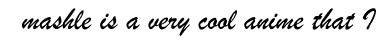

In [ ]:
Image.open("/content/Cropped Images/BrushscriptMT$$test_1_0.jpg")

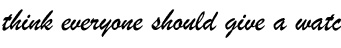

In [ ]:
Image.open("/content/Cropped Images/BrushscriptMT$$test_1_1.jpg")

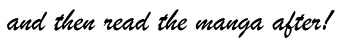

In [ ]:
Image.open("/content/Cropped Images/BrushscriptMT$$test_1_2.jpg")

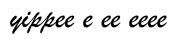

In [ ]:
Image.open("/content/Cropped Images/BrushscriptMT$$test_1_3.jpg")

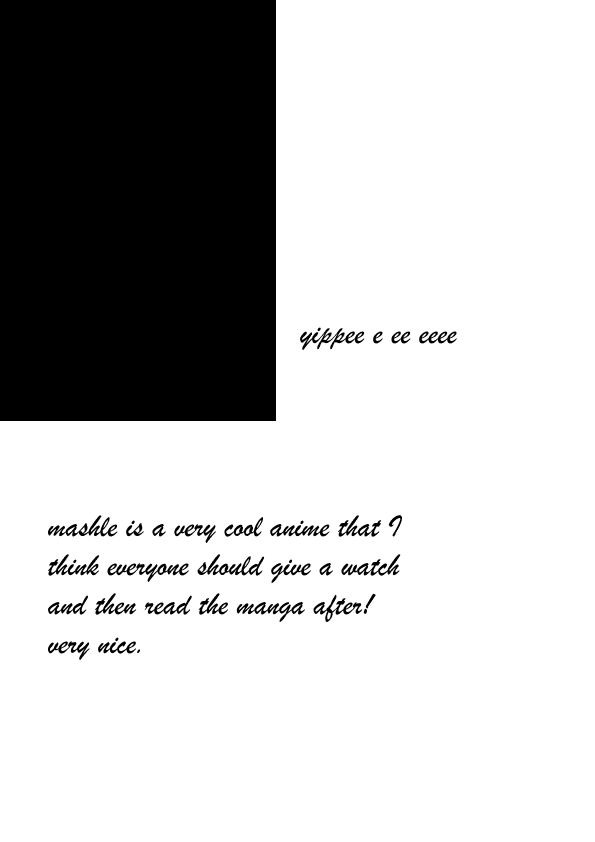

In [ ]:
Image.open("/content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_1.png")